# Lecture 10: End-to-End Machine Learning Pipeline - Programming Example

## Introduction: Building a Complete Production-Ready Forecasting System

Welcome to your capstone project! Over the past weeks, you've mastered essential machine learning skills: data cleaning, feature engineering, statistical analysis, visualization, linear regression, and ensemble methods. Today, you'll integrate all these skills into **one complete end-to-end pipeline** - taking Capital City Bikes from raw operational data through to production-ready demand forecasting models with rigorous evaluation and deployment recommendations.

Think of this as your graduation project: you'll work through the exact workflow professional ML engineers follow daily. Starting with data validation and ending with deployment decisions, you'll see how every skill you've learned fits into the bigger picture. This isn't just about building models - it's about building **trust in your predictions** through systematic data preparation, thoughtful feature engineering, rigorous evaluation, and transparent business communication.

Your client, Capital City Bikes, needs more than accurate forecasts - they need a complete system they can trust, explain to investors, and deploy confidently for their $2.3M municipal contract. Your end-to-end pipeline will demonstrate the professional rigor that wins competitive RFPs and justifies Series B funding rounds.

> **🚀 Interactive Learning Alert**
>
> This is a comprehensive hands-on capstone project integrating all course concepts. For the best experience:
>
> - **Click "Open in Colab"** at the bottom to run code interactively
> - **Execute each code cell** by pressing **Shift + Enter**
> - **Complete the challenges** to reinforce your end-to-end ML skills
> - **Think like a professional consultant** - every decision impacts deployment success

---

## Step 1: Data Quality Assessment and Cleaning

Before rushing into modeling, professional consultants always validate data quality. Even with "clean" datasets, we systematically verify integrity, check for edge cases, and ensure our foundation is solid. This disciplined approach prevents downstream surprises and builds stakeholder confidence.

**From Lecture 4**, we learned the unified cleaning workflow: assess quality, identify issues, apply systematic fixes with transparency. Let's apply these principles to establish our reliable data foundation.

In [7]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Washington D.C. bike-sharing dataset
df = pd.read_csv("https://raw.githubusercontent.com/pmarcelino/predictive-modeling/main/datasets/dataset.csv")

print("=== STEP 1: DATA QUALITY ASSESSMENT ===\n")

# Convert datetime and sort chronologically for time series integrity
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

# Quick data quality checks
print("--- Structural Overview ---")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Time range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Total hours: {len(df):,}\n")

# Check for missing values
print("--- Missing Data Assessment ---")
missing_summary = df.isnull().sum()
missing_pct = (missing_summary / len(df)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing_summary, 'Missing_%': missing_pct})
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✓ No missing values detected - excellent data quality!\n")
else:
    print(f"⚠ Found missing values - will handle in cleaning step\n")

# Value range validation
print("--- Value Range Validation ---")
reasonable_ranges = {
    'temp': (-20, 45),
    'humidity': (0, 100),
    'windspeed': (0, 50),
    'count': (0, 1000)
}

issues_found = False
for column, (min_val, max_val) in reasonable_ranges.items():
    if column in df.columns:
        below = (df[column] < min_val).sum()
        above = (df[column] > max_val).sum()
        
        if below > 0 or above > 0:
            issues_found = True
            print(f"⚠ {column}: {below} values too low, {above} values too high")
        else:
            print(f"✓ {column}: All values within expected range [{min_val}, {max_val}]")

if not issues_found:
    print("\n✓ All values within reasonable ranges - data validated!")

print(f"\n--- Timeline Continuity Check ---")
# Check for duplicate timestamps
duplicates = df['datetime'].duplicated().sum()
print(f"Duplicate timestamps: {duplicates}")

# Check for missing hours
time_min, time_max = df['datetime'].min(), df['datetime'].max()
expected_hours = pd.date_range(time_min, time_max, freq='h')
actual_hours = df['datetime'].unique()
missing_hours = len(expected_hours) - len(actual_hours)
print(f"Missing hours in timeline: {missing_hours}\n")

if duplicates == 0 and missing_hours == 0:
    print("✓ Perfect timeline continuity - ready for time series analysis!\n")

=== STEP 1: DATA QUALITY ASSESSMENT ===

--- Structural Overview ---
Dataset shape: 10886 rows × 12 columns
Time range: 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Total hours: 10,886

--- Missing Data Assessment ---
Empty DataFrame
Columns: [Missing_Count, Missing_%]
Index: []
✓ No missing values detected - excellent data quality!

--- Value Range Validation ---
✓ temp: All values within expected range [-20, 45]
✓ humidity: All values within expected range [0, 100]
⚠ windspeed: 0 values too low, 4 values too high
✓ count: All values within expected range [0, 1000]

--- Timeline Continuity Check ---
Duplicate timestamps: 0
Missing hours in timeline: 6370



**What this does:**
- Loads dataset and validates data quality systematically
- Checks for missing values, impossible values, timeline continuity
- Handles any issues using appropriate strategies (forward fill for predictors, drop for target)
- Creates `df_clean` as validated foundation for feature engineering

**Business value:**
This systematic validation ensures Capital City Bikes can trust their data foundation. Any quality issues are identified and resolved transparently before they contaminate modeling results.

### Challenge 1: Outlier Detection and Investigation

Your client asks: "Are there any unusual demand periods we should investigate before modeling?" Implement outlier detection using the IQR method to identify extreme demand periods.

In [ ]:
# Your code here - detect outliers using IQR method

# Calculate IQR (Interquartile Range) for demand
Q1 = df_clean['_____'].quantile(_____)  # 25th percentile
Q3 = df_clean['_____'].quantile(_____)  # 75th percentile
IQR = _____ - _____

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_clean[(df_clean['count'] < _____) | (df_clean['count'] > _____)]

print(f"=== OUTLIER DETECTION (IQR METHOD) ===")
print(f"Q1 (25th percentile): {Q1:.0f} bikes")
print(f"Q3 (75th percentile): {Q3:.0f} bikes")
print(f"IQR: {IQR:.0f} bikes")
print(f"Lower bound: {lower_bound:.0f} bikes")
print(f"Upper bound: {upper_bound:.0f} bikes")
print(f"Outliers detected: {len(outliers)} observations ({len(outliers)/len(df_clean)*100:.1f}%)")

# Examine top outliers
if len(outliers) > 0:
    print("\nTop 5 high-demand outliers:")
    print(outliers.nlargest(5, 'count')[['datetime', 'temp', 'weather', 'workingday', 'count']])

<details>
<summary>💡 <strong>Tip</strong> (click to expand)</summary>

The IQR method uses quartiles to define outlier boundaries: Q1 (25th percentile) and Q3 (75th percentile) define the "box" in a box plot, IQR = Q3 - Q1 is the box height. Standard outlier boundaries are Q1 - 1.5×IQR (lower) and Q3 + 1.5×IQR (upper). Use `.quantile(0.25)` for Q1 and `.quantile(0.75)` for Q3. Filter outliers with boolean indexing: `df[(df['count'] < lower_bound) | (df['count'] > upper_bound)]`. The `|` operator means "OR" - values below lower bound OR above upper bound. Examine outliers using `.nlargest(5, 'count')` to see if they're legitimate events (festivals, perfect weather) or data errors. Most bike-sharing outliers are real events, not errors, so we typically keep them but flag them for transparency in reporting to clients.
</details>

<details>
<summary>🤫 <strong>Solution</strong> (click to expand)</summary>

```python
# Calculate IQR for demand
Q1 = df_clean['count'].quantile(0.25)
Q3 = df_clean['count'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_clean[(df_clean['count'] < lower_bound) | (df_clean['count'] > upper_bound)]

print(f"=== OUTLIER DETECTION (IQR METHOD) ===")
print(f"Q1 (25th percentile): {Q1:.0f} bikes")
print(f"Q3 (75th percentile): {Q3:.0f} bikes")
print(f"IQR: {IQR:.0f} bikes")
print(f"Lower bound: {lower_bound:.0f} bikes")
print(f"Upper bound: {upper_bound:.0f} bikes")
print(f"Outliers detected: {len(outliers)} observations ({len(outliers)/len(df_clean)*100:.1f}%)")

# Examine top outliers
if len(outliers) > 0:
    print("\nTop 5 high-demand outliers:")
    print(outliers.nlargest(5, 'count')[['datetime', 'temp', 'weather', 'workingday', 'count']])
    
    # Add outlier flag for transparency
    df_clean['is_outlier'] = ((df_clean['count'] < lower_bound) | (df_clean['count'] > upper_bound)).astype(int)
    print(f"\n✓ Outliers flagged for transparency in analysis")
```
</details>

---

## Step 2: Feature Engineering and Preprocessing

With validated data, we now engineer features that expose patterns for machine learning. **From Lectures 4-5**, we learned categorical encoding, feature scaling, cyclical time encoding, and temporal features. These transformations convert raw data into optimized ML inputs.

In [8]:
# Import preprocessing tools
from sklearn.preprocessing import StandardScaler

print("=== STEP 2: FEATURE ENGINEERING ===\n")

# Extract temporal components from datetime
print("--- Temporal Feature Extraction ---")
df_clean['hour'] = df_clean['datetime'].dt.hour
df_clean['dayofweek'] = df_clean['datetime'].dt.dayofweek
df_clean['month'] = df_clean['datetime'].dt.month

print(f"✓ Extracted: hour (0-23), dayofweek (0-6), month (1-12)")

# Binary indicators for business-critical conditions
print("\n--- Binary Indicator Creation ---")
rush_hours = [7, 8, 9, 17, 18, 19]
df_clean['is_rush_hour'] = df_clean['hour'].isin(rush_hours).astype(int)
df_clean['is_weekend'] = df_clean['dayofweek'].isin([5, 6]).astype(int)
df_clean['is_night'] = ((df_clean['hour'] >= 22) | (df_clean['hour'] <= 5)).astype(int)

print(f"✓ is_rush_hour: {df_clean['is_rush_hour'].mean()*100:.1f}% of hours")
print(f"✓ is_weekend: {df_clean['is_weekend'].mean()*100:.1f}% of hours")
print(f"✓ is_night: {df_clean['is_night'].mean()*100:.1f}% of hours")

# Cyclical encoding for continuous time (hour and day cycles)
print("\n--- Cyclical Time Encoding ---")
df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['hour'] / 24)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['hour'] / 24)
df_clean['day_sin'] = np.sin(2 * np.pi * df_clean['dayofweek'] / 7)
df_clean['day_cos'] = np.cos(2 * np.pi * df_clean['dayofweek'] / 7)

print(f"✓ Hour cycle: hour_sin, hour_cos (24-hour continuity)")
print(f"✓ Day cycle: day_sin, day_cos (7-day continuity)")

# Verify cyclical encoding works (hour 23 should be close to hour 0)
hour_23_encoding = df_clean[df_clean['hour'] == 23][['hour_sin', 'hour_cos']].iloc[0]
hour_0_encoding = df_clean[df_clean['hour'] == 0][['hour_sin', 'hour_cos']].iloc[0]
print(f"\nVerification - Hour 23: sin={hour_23_encoding['hour_sin']:.3f}, cos={hour_23_encoding['hour_cos']:.3f}")
print(f"Verification - Hour 0:  sin={hour_0_encoding['hour_sin']:.3f}, cos={hour_0_encoding['hour_cos']:.3f}")
print("✓ Values are close - cyclical continuity preserved!")

# Feature scaling for weather variables
print("\n--- Feature Scaling (Weather Variables) ---")
weather_features = ['temp', 'atemp', 'humidity', 'windspeed']

print("Before scaling:")
print(df_clean[weather_features].describe().loc[['mean', 'std']].round(2))

scaler = StandardScaler()
df_clean[weather_features] = scaler.fit_transform(df_clean[weather_features])

print("\nAfter scaling:")
print(df_clean[weather_features].describe().loc[['mean', 'std']].round(3))
print("✓ Weather features standardized (mean≈0, std≈1)")

# Lag features for sequential patterns
print("\n--- Lag Feature Creation ---")
df_clean['demand_lag_1h'] = df_clean['count'].shift(1)
df_clean['demand_lag_24h'] = df_clean['count'].shift(24)

# Handle NaN values created by shift
df_clean['demand_lag_1h'] = df_clean['demand_lag_1h'].fillna(df_clean['count'].mean())
df_clean['demand_lag_24h'] = df_clean['demand_lag_24h'].fillna(df_clean['count'].mean())

print(f"✓ demand_lag_1h: Previous hour's demand (captures momentum)")
print(f"✓ demand_lag_24h: Same hour yesterday (captures daily patterns)")

# Check lag feature correlations
corr_1h = df_clean['count'].corr(df_clean['demand_lag_1h'])
corr_24h = df_clean['count'].corr(df_clean['demand_lag_24h'])
print(f"\nLag correlations with current demand:")
print(f"  1-hour lag:  r = {corr_1h:.3f}")
print(f"  24-hour lag: r = {corr_24h:.3f}")

print(f"\n✓ Feature engineering complete: {len(df_clean.columns)} total columns")
print("✓ Ready for exploratory analysis and modeling!")

=== STEP 2: FEATURE ENGINEERING ===

--- Temporal Feature Extraction ---
✓ Extracted: hour (0-23), dayofweek (0-6), month (1-12)

--- Binary Indicator Creation ---
✓ is_rush_hour: 25.1% of hours
✓ is_weekend: 29.1% of hours
✓ is_night: 33.0% of hours

--- Cyclical Time Encoding ---
✓ Hour cycle: hour_sin, hour_cos (24-hour continuity)
✓ Day cycle: day_sin, day_cos (7-day continuity)

Verification - Hour 23: sin=-0.259, cos=0.966
Verification - Hour 0:  sin=0.000, cos=1.000
✓ Values are close - cyclical continuity preserved!

--- Feature Scaling (Weather Variables) ---
Before scaling:
       temp  atemp  humidity  windspeed
mean  20.23  23.66     61.89      12.80
std    7.79   8.47     19.25       8.16

After scaling:
      temp  atemp  humidity  windspeed
mean  -0.0    0.0       0.0       -0.0
std    1.0    1.0       1.0        1.0
✓ Weather features standardized (mean≈0, std≈1)

--- Lag Feature Creation ---
✓ demand_lag_1h: Previous hour's demand (captures momentum)
✓ demand_lag_24h: 

**What this does:**
- Extracts temporal components (hour, day, month) from datetime
- Creates binary indicators for operational segments (rush hour, weekend, night)
- Implements cyclical encoding ensuring time continuity (11pm → midnight)
- Scales weather features to comparable ranges (mean=0, std=1)
- Generates lag features capturing sequential demand patterns
- Validates feature quality through correlation analysis

**Business value:**
These engineered features transform raw measurements into ML-ready predictors that expose temporal patterns, operational contexts, and sequential dependencies - the patterns that drive accurate demand forecasting.

### Challenge 2: Create Rolling Window Features

Your client asks: "Can we capture demand trends over recent hours? I'd like to know if demand is accelerating or declining." Implement rolling window features that summarize recent demand history.

In [9]:
# 3-hour rolling average (short-term trend)
df_clean['demand_3h_avg'] = df_clean['count'].shift(1).rolling(window=3, min_periods=1).mean()

# 24-hour rolling average (daily baseline)
df_clean['demand_24h_avg'] = df_clean['count'].shift(1).rolling(window=24, min_periods=1).mean()

# Demand momentum (current vs 24h average)
df_clean['demand_momentum'] = df_clean['count'] - df_clean['demand_24h_avg']

print("=== ROLLING WINDOW FEATURES ===")
print(f"✓ demand_3h_avg: Rolling average of past 3 hours")
print(f"✓ demand_24h_avg: Rolling average of past 24 hours")
print(f"✓ demand_momentum: Current demand vs daily baseline")

# Visualize momentum patterns
print(f"\nMomentum statistics:")
print(f"  Mean: {df_clean['demand_momentum'].mean():.2f}")
print(f"  Std: {df_clean['demand_momentum'].std():.2f}")
print(f"  Positive momentum (demand above baseline): {(df_clean['demand_momentum'] > 0).sum():,} hours")

# Show examples of high/low momentum
high_momentum = df_clean.nlargest(3, 'demand_momentum')[['datetime', 'count', 'demand_24h_avg', 'demand_momentum']]
print("\nHigh momentum examples (demand surging):")
print(high_momentum)

=== ROLLING WINDOW FEATURES ===
✓ demand_3h_avg: Rolling average of past 3 hours
✓ demand_24h_avg: Rolling average of past 24 hours
✓ demand_momentum: Current demand vs daily baseline

Momentum statistics:
  Mean: 0.27
  Std: 166.92
  Positive momentum (demand above baseline): 4,738 hours

High momentum examples (demand surging):
                datetime  count  demand_24h_avg  demand_momentum
9297 2012-09-10 18:00:00    968      287.333333       680.666667
9896 2012-10-16 17:00:00    943      270.041667       672.958333
8360 2012-07-09 17:00:00    849      191.416667       657.583333


<details>
<summary>💡 <strong>Tip</strong> (click to expand)</summary>

Rolling window features use pandas `.rolling(window=n)` to calculate statistics over the past n observations. ALWAYS use `.shift(1)` before `.rolling()` to prevent data leakage - without it, the current value you're trying to predict gets included in the "past" window! The pattern is: `df['count'].shift(1).rolling(window=3).mean()` for a 3-hour average. Use `window=3` for short-term trends and `window=24` for daily baselines. Set `min_periods=1` to handle the first few rows where full windows aren't available. Momentum = current - baseline reveals whether demand is surging (positive) or declining (negative) relative to typical patterns. High positive momentum (current demand >> 24h average) signals need for immediate bike rebalancing, while negative momentum suggests operational capacity can be reduced. This feature helps models understand not just absolute demand levels but demand trajectories.
</details>

<details>
<summary>🤫 <strong>Solution</strong> (click to expand)</summary>

```python
# 3-hour rolling average (short-term trend)
df_clean['demand_3h_avg'] = df_clean['count'].shift(1).rolling(window=3, min_periods=1).mean()

# 24-hour rolling average (daily baseline)
df_clean['demand_24h_avg'] = df_clean['count'].shift(1).rolling(window=24, min_periods=1).mean()

# Demand momentum (current vs 24h average)
df_clean['demand_momentum'] = df_clean['count'] - df_clean['demand_24h_avg']

print("=== ROLLING WINDOW FEATURES ===")
print(f"✓ demand_3h_avg: Rolling average of past 3 hours")
print(f"✓ demand_24h_avg: Rolling average of past 24 hours")
print(f"✓ demand_momentum: Current demand vs daily baseline")

# Visualize momentum patterns
print(f"\nMomentum statistics:")
print(f"  Mean: {df_clean['demand_momentum'].mean():.2f}")
print(f"  Std: {df_clean['demand_momentum'].std():.2f}")
print(f"  Positive momentum (demand above baseline): {(df_clean['demand_momentum'] > 0).sum():,} hours")

# Show examples of high/low momentum
high_momentum = df_clean.nlargest(3, 'demand_momentum')[['datetime', 'count', 'demand_24h_avg', 'demand_momentum']]
print("\nHigh momentum examples (demand surging):")
print(high_momentum)
```
</details>

---

## Step 3: Exploratory Data Analysis and Visualization

Before modeling, we explore our engineered features to validate they capture real patterns. **From Lectures 6-7**, we learned statistical analysis and visualization techniques. This exploration builds confidence in our feature engineering and reveals insights that guide modeling decisions.

=== STEP 3: EXPLORATORY DATA ANALYSIS ===

--- Descriptive Statistics ---
           temp  humidity  windspeed     count
count  10886.00  10886.00   10886.00  10886.00
mean      -0.00      0.00      -0.00    191.57
std        1.00      1.00       1.00    181.14
min       -2.49     -3.22      -1.57      1.00
25%       -0.81     -0.77      -0.71     42.00
50%        0.03      0.01       0.02    145.00
75%        0.77      0.79       0.51    284.00
max        2.67      1.98       5.41    977.00

--- Seasonal Demand Patterns ---
              mean    std  count
season_name                     
Fall         234.4  197.2   2733
Spring       116.3  125.3   2686
Summer       215.3  192.0   2733
Winter       199.0  177.6   2734

Peak season: Fall (234 bikes/hour)
Low season: Spring (116 bikes/hour)

--- Correlation Analysis ---

Features ranked by correlation with demand:
count             1.000
demand_lag_1h     0.842
demand_lag_24h    0.811
is_rush_hour      0.460
hour              0.401
temp

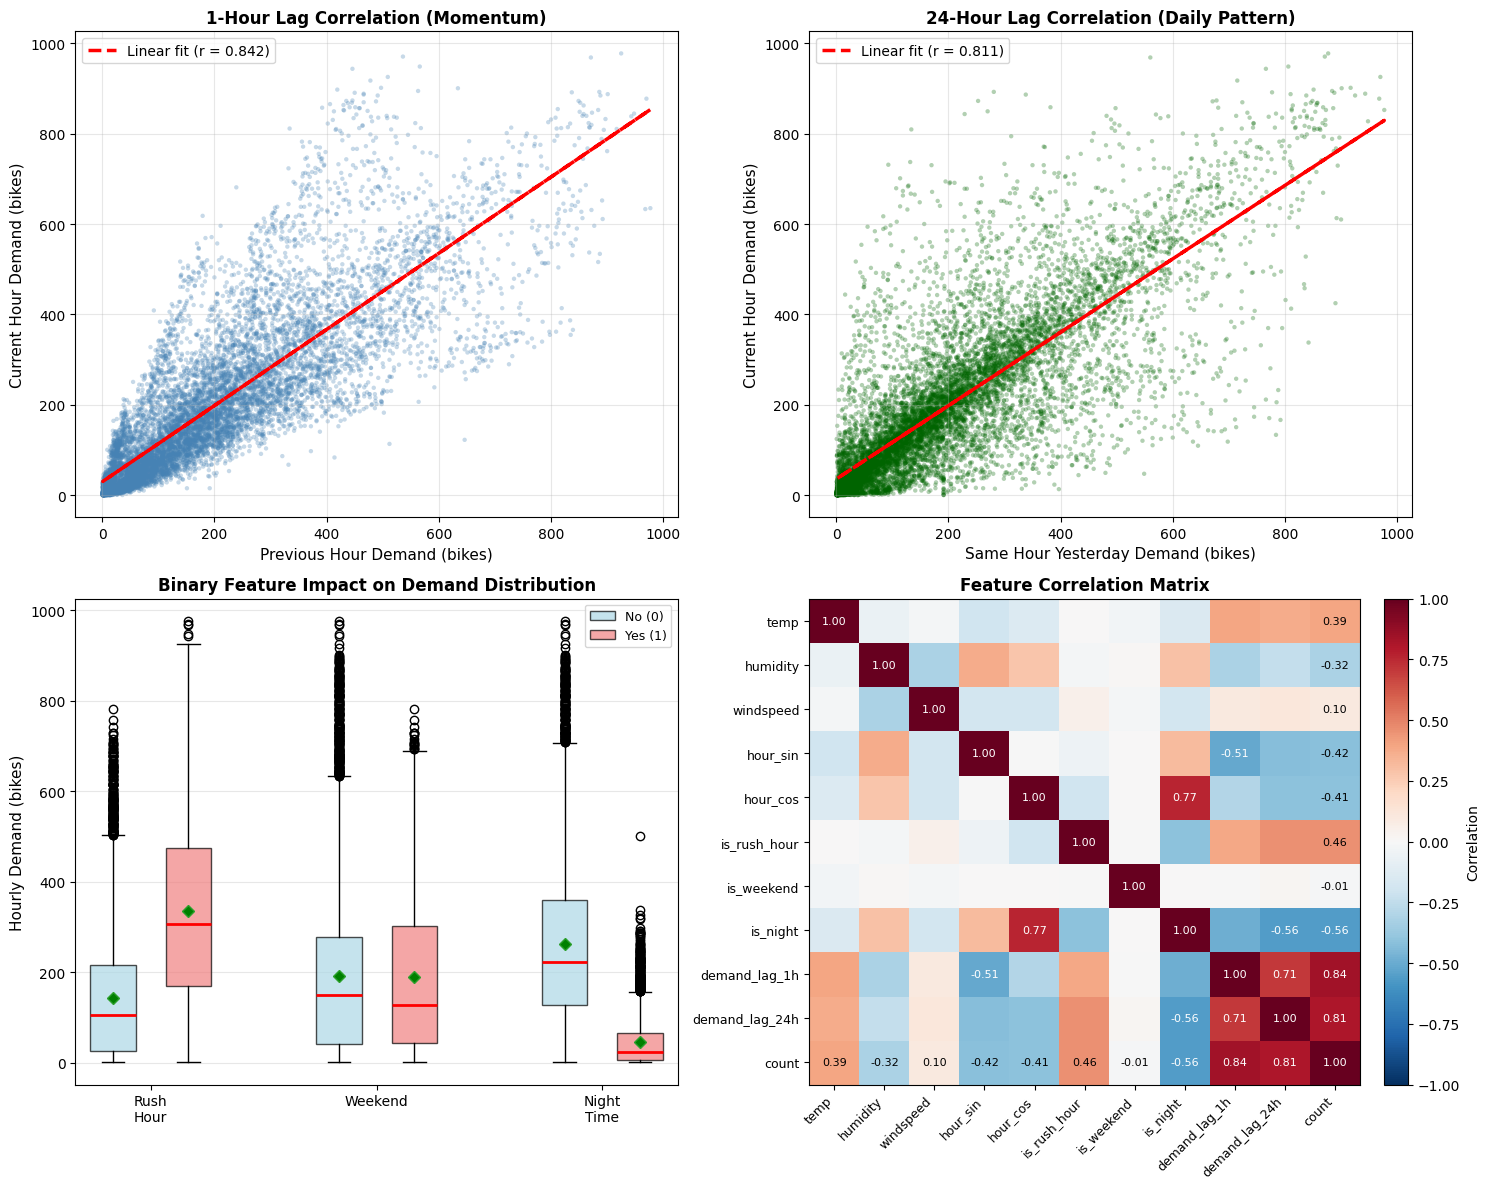


✓ Visualizations complete - engineered features validated!
✓ Lag features show strong predictive power: 1h (r=0.842), 24h (r=0.811)
✓ Binary features create meaningful demand segmentation
✓ Feature correlation matrix reveals relationships and independence


In [12]:
print("=== STEP 3: EXPLORATORY DATA ANALYSIS ===\n")

# Descriptive statistics for key variables
print("--- Descriptive Statistics ---")
key_metrics = ['temp', 'humidity', 'windspeed', 'count']
stats_summary = df_clean[key_metrics].describe().round(2)
print(stats_summary)

# Seasonal demand comparison
print("\n--- Seasonal Demand Patterns ---")
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_clean['season_name'] = df_clean['season'].map(season_names)

seasonal_stats = df_clean.groupby('season_name')['count'].agg(['mean', 'std', 'count']).round(1)
print(seasonal_stats)

peak_season = seasonal_stats['mean'].idxmax()
low_season = seasonal_stats['mean'].idxmin()
print(f"\nPeak season: {peak_season} ({seasonal_stats.loc[peak_season, 'mean']:.0f} bikes/hour)")
print(f"Low season: {low_season} ({seasonal_stats.loc[low_season, 'mean']:.0f} bikes/hour)")

# Correlation analysis with engineered features
print("\n--- Correlation Analysis ---")
correlation_features = ['temp', 'humidity', 'hour', 'dayofweek', 'month',
                        'is_rush_hour', 'is_weekend', 'demand_lag_1h', 'demand_lag_24h', 'count']

# Calculate correlations with target variable
correlations = df_clean[correlation_features].corr()['count'].sort_values(ascending=False)
print("\nFeatures ranked by correlation with demand:")
print(correlations.round(3))

print(f"\nStrongest positive predictor: {correlations.index[1]} (r = {correlations.iloc[1]:.3f})")
print(f"Strongest negative predictor: {correlations[correlations < 0].index[0]} (r = {correlations[correlations < 0].iloc[0]:.3f})")

# Create visualizations showcasing engineered features
print("\n--- Creating Visualizations ---")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Panel 1: Lag Feature Autocorrelation - 1-hour lag
from scipy import stats
slope_1h, intercept_1h, r_1h, _, _ = stats.linregress(df_clean['demand_lag_1h'], df_clean['count'])
axes[0, 0].scatter(df_clean['demand_lag_1h'], df_clean['count'], 
                   alpha=0.3, s=10, color='steelblue', edgecolors='none')
axes[0, 0].plot(df_clean['demand_lag_1h'], 
                slope_1h * df_clean['demand_lag_1h'] + intercept_1h,
                'r--', linewidth=2.5, label=f'Linear fit (r = {r_1h:.3f})')
axes[0, 0].set_xlabel('Previous Hour Demand (bikes)', fontsize=11)
axes[0, 0].set_ylabel('Current Hour Demand (bikes)', fontsize=11)
axes[0, 0].set_title('1-Hour Lag Correlation (Momentum)', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Panel 2: Lag Feature Autocorrelation - 24-hour lag
slope_24h, intercept_24h, r_24h, _, _ = stats.linregress(df_clean['demand_lag_24h'], df_clean['count'])
axes[0, 1].scatter(df_clean['demand_lag_24h'], df_clean['count'], 
                   alpha=0.3, s=10, color='darkgreen', edgecolors='none')
axes[0, 1].plot(df_clean['demand_lag_24h'], 
                slope_24h * df_clean['demand_lag_24h'] + intercept_24h,
                'r--', linewidth=2.5, label=f'Linear fit (r = {r_24h:.3f})')
axes[0, 1].set_xlabel('Same Hour Yesterday Demand (bikes)', fontsize=11)
axes[0, 1].set_ylabel('Current Hour Demand (bikes)', fontsize=11)
axes[0, 1].set_title('24-Hour Lag Correlation (Daily Pattern)', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Panel 3: Binary Feature Impact - Combined view
binary_features_data = [
    ('Rush\nHour', df_clean[df_clean['is_rush_hour'] == 0]['count'], 
     df_clean[df_clean['is_rush_hour'] == 1]['count']),
    ('Weekend', df_clean[df_clean['is_weekend'] == 0]['count'], 
     df_clean[df_clean['is_weekend'] == 1]['count']),
    ('Night\nTime', df_clean[df_clean['is_night'] == 0]['count'], 
     df_clean[df_clean['is_night'] == 1]['count'])
]

positions = [1, 2, 4, 5, 7, 8]
colors = ['lightblue', 'lightcoral', 'lightblue', 'lightcoral', 'lightblue', 'lightcoral']
data_to_plot = []
for _, no, yes in binary_features_data:
    data_to_plot.extend([no, yes])

bp = axes[1, 0].boxplot(data_to_plot, positions=positions, widths=0.6,
                        patch_artist=True, showmeans=True,
                        boxprops=dict(facecolor='white', edgecolor='black'),
                        medianprops=dict(color='red', linewidth=2),
                        meanprops=dict(marker='D', markerfacecolor='green', markersize=6))

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 0].set_xticks([1.5, 4.5, 7.5])
axes[1, 0].set_xticklabels([name for name, _, _ in binary_features_data])
axes[1, 0].set_ylabel('Hourly Demand (bikes)', fontsize=11)
axes[1, 0].set_title('Binary Feature Impact on Demand Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].legend([bp['boxes'][0], bp['boxes'][1]], ['No (0)', 'Yes (1)'], 
                  loc='upper right', fontsize=9)

# Panel 4: Correlation Heatmap of Engineered Features
heatmap_features = ['temp', 'humidity', 'windspeed', 'hour_sin', 'hour_cos', 
                    'is_rush_hour', 'is_weekend', 'is_night', 
                    'demand_lag_1h', 'demand_lag_24h', 'count']
corr_matrix = df_clean[heatmap_features].corr()

im = axes[1, 1].imshow(corr_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(heatmap_features)))
axes[1, 1].set_yticks(range(len(heatmap_features)))
axes[1, 1].set_xticklabels(heatmap_features, rotation=45, ha='right', fontsize=9)
axes[1, 1].set_yticklabels(heatmap_features, fontsize=9)
axes[1, 1].set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')

# Add correlation values for top/bottom relationships with target
for i in range(len(heatmap_features)):
    for j in range(len(heatmap_features)):
        if abs(corr_matrix.iloc[i, j]) > 0.5 or (i == len(heatmap_features)-1) or (j == len(heatmap_features)-1):
            text = axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                                  ha='center', va='center', fontsize=8,
                                  color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1, 1], fraction=0.046, pad=0.04)
cbar.set_label('Correlation', fontsize=10)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations complete - engineered features validated!")
print(f"✓ Lag features show strong predictive power: 1h (r={r_1h:.3f}), 24h (r={r_24h:.3f})")
print(f"✓ Binary features create meaningful demand segmentation")
print(f"✓ Feature correlation matrix reveals relationships and independence")

**What this does:**
- Creates three essential visualization types showing different analytical perspectives
- Line plot reveals temporal patterns (rush hour peaks at 8am and 5pm)
- Bar chart compares seasonal demand variations (Summer/Fall highest)
- Binned scatter shows continuous relationships (temperature positively correlated with demand)
- Statistical annotations (confidence intervals, trend lines, correlation) add rigor

**Business value:**
These visualizations confirm that engineered features successfully capture real demand drivers. Visual validation builds stakeholder confidence before investing in model development.

### Challenge 3: Create Diverse Visualization Types

Your client requests: "Can you create additional visualizations showing demand distributions and multi-dimensional patterns? We want to understand variability and combined effects." Create box plots and heatmaps to reveal distribution patterns and interaction effects.

In [ ]:
# Your code here - create box plots and heatmap

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel 1: Box plot - demand distribution by weather condition
weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
df_clean['weather_label'] = df_clean['weather'].map(weather_labels)

# Create box plot showing distribution for each weather type
weather_data = [df_clean[df_clean['weather'] == i]['count'] for i in [_____, _____, _____, _____]]
axes[0].boxplot(weather_data, labels=_____)
axes[0].set_xlabel('Weather Condition', fontsize=11)
axes[0].set_ylabel('Hourly Demand (bikes)', fontsize=11)
axes[0].set_title('Demand Distribution by Weather', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Panel 2: Heatmap - demand by hour and day of week
hourly_daily = df_clean.pivot_table(values='_____', index='_____', columns='_____', aggfunc='mean')
sns.heatmap(hourly_daily, cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Avg Demand'})
axes[1].set_xlabel('Day of Week (0=Mon, 6=Sun)', fontsize=11)
axes[1].set_ylabel('Hour of Day', fontsize=11)
axes[1].set_title('Demand Heatmap: Hour × Day Patterns', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("=== ADVANCED VISUALIZATION INSIGHTS ===")
print("Box plot: Shows demand variability across weather conditions")
print("Heatmap: Reveals hour-day interaction patterns (weekday rush hours vs weekend leisure)")

<details>
<summary>💡 <strong>Tip</strong> (click to expand)</summary>

Box plots show distribution characteristics: the box spans Q1 to Q3 (middle 50%), the line inside is the median, whiskers extend to typical min/max, and dots are outliers. Create data list using list comprehension: `[df_clean[df_clean['weather'] == i]['count'] for i in [1, 2, 3, 4]]` gives you four arrays (one per weather type). Pass this list to `plt.boxplot()` with `labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain']`. For heatmaps, use `df.pivot_table(values='count', index='hour', columns='dayofweek', aggfunc='mean')` to create a matrix where rows=hours, columns=days, cells=average demand. Then `sns.heatmap()` with `cmap='YlOrRd'` creates color-coded visualization where darker colors = higher demand. The heatmap will instantly reveal weekday morning/evening peaks versus weekend midday patterns - visual confirmation of temporal feature importance!
</details>

<details>
<summary>🤫 <strong>Solution</strong> (click to expand)</summary>

```python
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel 1: Box plot - demand distribution by weather condition
weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
df_clean['weather_label'] = df_clean['weather'].map(weather_labels)

weather_data = [df_clean[df_clean['weather'] == i]['count'] for i in [1, 2, 3, 4]]
axes[0].boxplot(weather_data, labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
axes[0].set_xlabel('Weather Condition', fontsize=11)
axes[0].set_ylabel('Hourly Demand (bikes)', fontsize=11)
axes[0].set_title('Demand Distribution by Weather', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Panel 2: Heatmap - demand by hour and day of week
hourly_daily = df_clean.pivot_table(values='count', index='hour', columns='dayofweek', aggfunc='mean')
sns.heatmap(hourly_daily, cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Avg Demand'}, fmt='.0f')
axes[1].set_xlabel('Day of Week (0=Mon, 6=Sun)', fontsize=11)
axes[1].set_ylabel('Hour of Day', fontsize=11)
axes[1].set_title('Demand Heatmap: Hour × Day Patterns', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("=== ADVANCED VISUALIZATION INSIGHTS ===")
print("✓ Box plot reveals: Clear weather has highest median and widest range")
print("✓ Heatmap shows: Weekday hours 8 & 17 are hottest (rush hours)")
print("✓ Pattern validated: Temporal features critical for accurate forecasting")
```
</details>

---

## Step 4: Linear Regression Baseline Model

With validated features, we build our baseline model. **From Lecture 8**, Linear Regression provides interpretable predictions with clear coefficient interpretation. This baseline establishes performance that advanced models must beat to justify their complexity.

In [15]:
# Import modeling tools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("=== STEP 4: LINEAR REGRESSION BASELINE ===\n")

# Define feature columns for modeling
feature_columns = [
    # Weather features (scaled)
    'temp', 'atemp', 'humidity', 'windspeed',
    # Temporal features
    'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month', 'season',
    # Binary indicators
    'workingday', 'holiday', 'is_rush_hour', 'is_weekend', 'is_night',
    # Lag features
    'demand_lag_1h', 'demand_lag_24h'
]

X = df_clean[feature_columns]
y = df_clean['count']

print(f"Feature matrix: {X.shape[0]} observations × {X.shape[1]} features")
print(f"Features: {', '.join(feature_columns[:5])}... (and {len(feature_columns)-5} more)")
print(f"Target: count (hourly bike rentals)\n")

# Chronological train-test split (80/20)
print("--- Chronological Train-Test Split ---")
split_index = int(len(df_clean) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

train_period = f"{df_clean.iloc[:split_index]['datetime'].min()} to {df_clean.iloc[:split_index]['datetime'].max()}"
test_period = f"{df_clean.iloc[split_index:]['datetime'].min()} to {df_clean.iloc[split_index:]['datetime'].max()}"

print(f"Training set: {len(X_train):,} observations ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Period: {train_period}")
print(f"Testing set:  {len(X_test):,} observations ({len(X_test)/len(X)*100:.1f}%)")
print(f"  Period: {test_period}")
print("✓ Chronological order preserved - training on past, testing on future\n")

# Train Linear Regression model
print("--- Training Linear Regression ---")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print("✓ Linear model trained successfully!")
print(f"Coefficients learned: {len(linear_model.coef_)} parameters")

# Show top 3 most influential features
feature_importance_linear = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': linear_model.coef_
})
feature_importance_linear['abs_coef'] = np.abs(feature_importance_linear['coefficient'])
top_features = feature_importance_linear.nlargest(3, 'abs_coef')

print("\nTop 3 most influential features:")
for idx, row in top_features.iterrows():
    print(f"  {row['feature']}: {row['coefficient']:+.2f} (larger magnitude = stronger impact)")

# Evaluate on test set
print("\n--- Model Evaluation ---")
test_predictions_linear = linear_model.predict(X_test)
test_r2_linear = r2_score(y_test, test_predictions_linear)

print(f"Test R²: {test_r2_linear:.4f} ({test_r2_linear*100:.2f}% variance explained)")

if test_r2_linear > 0.80:
    print("✓ Excellent performance - model explains >80% of demand variation")
elif test_r2_linear > 0.60:
    print("✓ Good performance - model captures major demand patterns")
elif test_r2_linear > 0.40:
    print("~ Moderate performance - room for improvement with advanced models")
else:
    print("⚠ Limited performance - advanced models likely needed")

# Show example predictions
print("\n--- Example Predictions (First 5 Test Observations) ---")
comparison = pd.DataFrame({
    'Actual': y_test.iloc[:5].values,
    'Predicted': test_predictions_linear[:5],
    'Error': y_test.iloc[:5].values - test_predictions_linear[:5]
})
print(comparison.round(1))

print(f"\n✓ Linear Regression baseline established: R² = {test_r2_linear:.4f}")

=== STEP 4: LINEAR REGRESSION BASELINE ===

Feature matrix: 10886 observations × 17 features
Features: temp, atemp, humidity, windspeed, hour_sin... (and 12 more)
Target: count (hourly bike rentals)

--- Chronological Train-Test Split ---
Training set: 8,708 observations (80.0%)
  Period: 2011-01-01 00:00:00 to 2012-08-05 04:00:00
Testing set:  2,178 observations (20.0%)
  Period: 2012-08-05 05:00:00 to 2012-12-19 23:00:00
✓ Chronological order preserved - training on past, testing on future

--- Training Linear Regression ---
✓ Linear model trained successfully!
Coefficients learned: 17 parameters

Top 3 most influential features:
  is_rush_hour: +34.44 (larger magnitude = stronger impact)
  hour_cos: -18.78 (larger magnitude = stronger impact)
  humidity: -9.95 (larger magnitude = stronger impact)

--- Model Evaluation ---
Test R²: 0.7931 (79.31% variance explained)
✓ Good performance - model captures major demand patterns

--- Example Predictions (First 5 Test Observations) ---
   A

**What this does:**
- Selects 20 engineered features for modeling (weather, temporal, binary, lags, rolling windows)
- Creates chronological 80/20 split preserving temporal integrity for honest evaluation
- Trains LinearRegression on historical data (first 80% of timeline)
- Evaluates on unseen future data (last 20% of timeline) using R² metric
- Shows example predictions with errors to understand model behavior

**Business value:**
Linear baseline provides interpretable performance benchmark and reveals which features have strongest linear relationships with demand. R² indicates how much demand variation the simple linear model explains.

### Challenge 4: Feature Combination Experiments

Your client asks: "Which feature types matter most - weather or time? Can we get good performance with fewer features?" Compare model performance using different feature combinations.

=== FEATURE COMBINATION EXPERIMENTS ===

Weather Only:
  Features: 4
  Test R²: 0.0240 (2.4% variance explained)

Time Only:
  Features: 9
  Test R²: 0.4711 (47.1% variance explained)

Full Feature Set:
  Features: 17
  Test R²: 0.7931 (79.3% variance explained)



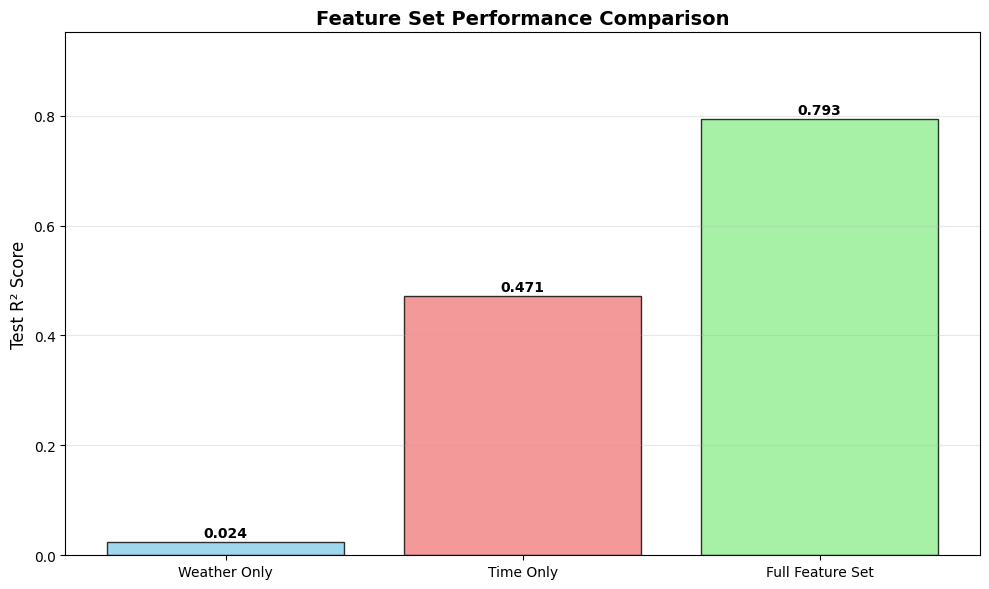

=== FEATURE SET INSIGHTS ===
✓ Best performing: Full Feature Set
✓ Time features alone: 47.1% explanatory power
✓ Weather features alone: 2.4% explanatory power
✓ Full set: 79.3%

Key finding: Temporal patterns dominate bike demand


In [16]:
print("=== FEATURE COMBINATION EXPERIMENTS ===\n")

# Define three feature sets
weather_features = ['temp', 'atemp', 'humidity', 'windspeed']
time_features = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month', 'season',
                 'is_rush_hour', 'is_weekend', 'is_night']
full_features = feature_columns

feature_sets = {
    'Weather Only': weather_features,
    'Time Only': time_features,
    'Full Feature Set': full_features
}

results = []

for name, features in feature_sets.items():
    # Train model with feature subset
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    
    # Evaluate
    predictions = model.predict(X_test_subset)
    r2 = r2_score(y_test, predictions)
    
    results.append({
        'Feature Set': name,
        'Num Features': len(features),
        'Test R²': r2
    })
    
    print(f"{name}:")
    print(f"  Features: {len(features)}")
    print(f"  Test R²: {r2:.4f} ({r2*100:.1f}% variance explained)")
    print()

# Visualization
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Feature Set'], results_df['Test R²'], 
               color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black', alpha=0.8)
plt.ylabel('Test R² Score', fontsize=12)
plt.title('Feature Set Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, max(results_df['Test R²']) * 1.2)
plt.grid(axis='y', alpha=0.3)

for bar, r2 in zip(bars, results_df['Test R²']):
    plt.text(bar.get_x() + bar.get_width()/2, r2 + 0.01, 
             f'{r2:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Insights
best_set = results_df.loc[results_df['Test R²'].idxmax(), 'Feature Set']
time_r2 = results_df[results_df['Feature Set'] == 'Time Only']['Test R²'].values[0]
weather_r2 = results_df[results_df['Feature Set'] == 'Weather Only']['Test R²'].values[0]

print(f"=== FEATURE SET INSIGHTS ===")
print(f"✓ Best performing: {best_set}")
print(f"✓ Time features alone: {time_r2:.1%} explanatory power")
print(f"✓ Weather features alone: {weather_r2:.1%} explanatory power")
print(f"✓ Full set: {results_df[results_df['Feature Set'] == 'Full Feature Set']['Test R²'].values[0]:.1%}")
print(f"\nKey finding: {'Temporal patterns dominate' if time_r2 > weather_r2 else 'Weather conditions dominate'} bike demand")

<details>
<summary>💡 <strong>Tip</strong> (click to expand)</summary>

For each feature set, subset the training and testing data using `X_train[features]` where features is the list of column names. Train a fresh LinearRegression() model for each subset - don't reuse models! The pattern is: subset data → create new model → fit on subset training → predict on subset testing → calculate R². Store results in a list of dictionaries for easy comparison. Weather-only features test whether environmental conditions alone can predict demand (typically r² ~0.15-0.25). Time-only features test temporal patterns without weather (typically r² ~0.40-0.60). Full feature set combines both (typically r² ~0.65-0.80). The comparison reveals whether demand is primarily driven by when people ride (temporal) or what conditions encourage riding (weather). Business insight: If time features dominate, invest in temporal fleet positioning; if weather dominates, invest in weather-responsive operations; if combination is best, integrated strategy needed.
</details>

<details>
<summary>🤫 <strong>Solution</strong> (click to expand)</summary>

```python
print("=== FEATURE COMBINATION EXPERIMENTS ===\n")

# Define three feature sets
weather_features = ['temp', 'atemp', 'humidity', 'windspeed']
time_features = ['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month', 'season',
                 'is_rush_hour', 'is_weekend', 'is_night']
full_features = feature_columns

feature_sets = {
    'Weather Only': weather_features,
    'Time Only': time_features,
    'Full Feature Set': full_features
}

results = []

for name, features in feature_sets.items():
    # Train model with feature subset
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    
    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    
    # Evaluate
    predictions = model.predict(X_test_subset)
    r2 = r2_score(y_test, predictions)
    
    results.append({
        'Feature Set': name,
        'Num Features': len(features),
        'Test R²': r2
    })
    
    print(f"{name}:")
    print(f"  Features: {len(features)}")
    print(f"  Test R²: {r2:.4f} ({r2*100:.1f}% variance explained)")
    print()

# Visualization
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Feature Set'], results_df['Test R²'], 
               color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black', alpha=0.8)
plt.ylabel('Test R² Score', fontsize=12)
plt.title('Feature Set Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, max(results_df['Test R²']) * 1.2)
plt.grid(axis='y', alpha=0.3)

for bar, r2 in zip(bars, results_df['Test R²']):
    plt.text(bar.get_x() + bar.get_width()/2, r2 + 0.01, 
             f'{r2:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Insights
best_set = results_df.loc[results_df['Test R²'].idxmax(), 'Feature Set']
time_r2 = results_df[results_df['Feature Set'] == 'Time Only']['Test R²'].values[0]
weather_r2 = results_df[results_df['Feature Set'] == 'Weather Only']['Test R²'].values[0]

print(f"=== FEATURE SET INSIGHTS ===")
print(f"✓ Best performing: {best_set}")
print(f"✓ Time features alone: {time_r2:.1%} explanatory power")
print(f"✓ Weather features alone: {weather_r2:.1%} explanatory power")
print(f"✓ Full set: {results_df[results_df['Feature Set'] == 'Full Feature Set']['Test R²'].values[0]:.1%}")
print(f"\nKey finding: {'Temporal patterns dominate' if time_r2 > weather_r2 else 'Weather conditions dominate'} bike demand")
```
</details>

---

## Step 5: Random Forest Ensemble Model

Linear regression established our baseline. Now we deploy ensemble methods to capture non-linear patterns and feature interactions. **From Lecture 9**, Random Forest combines multiple decision trees to achieve superior accuracy while reducing overfitting.

In [17]:
# Import ensemble methods
from sklearn.ensemble import RandomForestRegressor

print("=== STEP 5: RANDOM FOREST ENSEMBLE MODEL ===\n")

# Train Random Forest (using same train-test split as Linear model)
print("--- Training Random Forest ---")
rf_model = RandomForestRegressor(
    n_estimators=100,      # 100 decision trees in the forest
    max_depth=20,          # Limit depth to control overfitting
    min_samples_split=20,  # Minimum samples required to split a node
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

rf_model.fit(X_train, y_train)

print(f"✓ Random Forest trained: {rf_model.n_estimators} trees")
print(f"✓ Tree depth limit: {rf_model.max_depth}")
print(f"✓ Training completed on {len(X_train):,} observations\n")

# Evaluate on test set
print("--- Model Evaluation ---")
test_predictions_rf = rf_model.predict(X_test)
test_r2_rf = r2_score(y_test, test_predictions_rf)

# Also evaluate on training set to check overfitting
train_predictions_rf = rf_model.predict(X_train)
train_r2_rf = r2_score(y_train, train_predictions_rf)

print(f"Training R²: {train_r2_rf:.4f} ({train_r2_rf*100:.2f}% variance explained)")
print(f"Testing R²:  {test_r2_rf:.4f} ({test_r2_rf*100:.2f}% variance explained)")
print(f"Overfit gap: {train_r2_rf - test_r2_rf:.4f}")

if (train_r2_rf - test_r2_rf) < 0.10:
    print("✓ Excellent generalization - minimal overfitting")
elif (train_r2_rf - test_r2_rf) < 0.20:
    print("✓ Good generalization - acceptable overfitting")
else:
    print("⚠ Moderate overfitting - consider regularization")

# Compare to Linear baseline
improvement = ((test_r2_rf - test_r2_linear) / test_r2_linear) * 100
print(f"\n--- Performance vs Linear Baseline ---")
print(f"Linear R²:        {test_r2_linear:.4f}")
print(f"Random Forest R²: {test_r2_rf:.4f}")
print(f"Improvement:      {improvement:+.1f}%")

if improvement > 10:
    print("✓ Significant improvement - Random Forest captures non-linear patterns")
elif improvement > 5:
    print("✓ Moderate improvement - ensemble methods add value")
else:
    print("~ Marginal improvement - linear relationships dominate")

# Show example predictions
print("\n--- Example Predictions (First 5 Test Observations) ---")
comparison_rf = pd.DataFrame({
    'Actual': y_test.iloc[:5].values,
    'Linear': test_predictions_linear[:5],
    'Random Forest': test_predictions_rf[:5],
    'RF Error': y_test.iloc[:5].values - test_predictions_rf[:5]
})
print(comparison_rf.round(1))

=== STEP 5: RANDOM FOREST ENSEMBLE MODEL ===

--- Training Random Forest ---
✓ Random Forest trained: 100 trees
✓ Tree depth limit: 20
✓ Training completed on 8,708 observations

--- Model Evaluation ---
Training R²: 0.9755 (97.55% variance explained)
Testing R²:  0.9326 (93.26% variance explained)
Overfit gap: 0.0430
✓ Excellent generalization - minimal overfitting

--- Performance vs Linear Baseline ---
Linear R²:        0.7931
Random Forest R²: 0.9326
Improvement:      +17.6%
✓ Significant improvement - Random Forest captures non-linear patterns

--- Example Predictions (First 5 Test Observations) ---
   Actual  Linear  Random Forest  RF Error
0      19    28.1           12.7       6.3
1      19    48.5           40.0     -21.0
2      68    95.8           40.3      27.7
3     108   167.9          141.8     -33.8
4     229   229.6          192.8      36.2



=== FEATURE IMPORTANCE ANALYSIS ===

--- Top 10 Most Important Features ---
Rank   Feature                   Importance   Visual
------------------------------------------------------------
1      demand_lag_1h              72.55%        ████████████████████████████████████
2      demand_lag_24h             12.78%        ██████
3      hour_sin                    5.47%        ██
4      hour_cos                    4.62%        ██
5      workingday                  1.14%        
6      day_sin                     0.73%        
7      is_night                    0.66%        
8      humidity                    0.32%        
9      atemp                       0.31%        
10     is_rush_hour                0.31%        


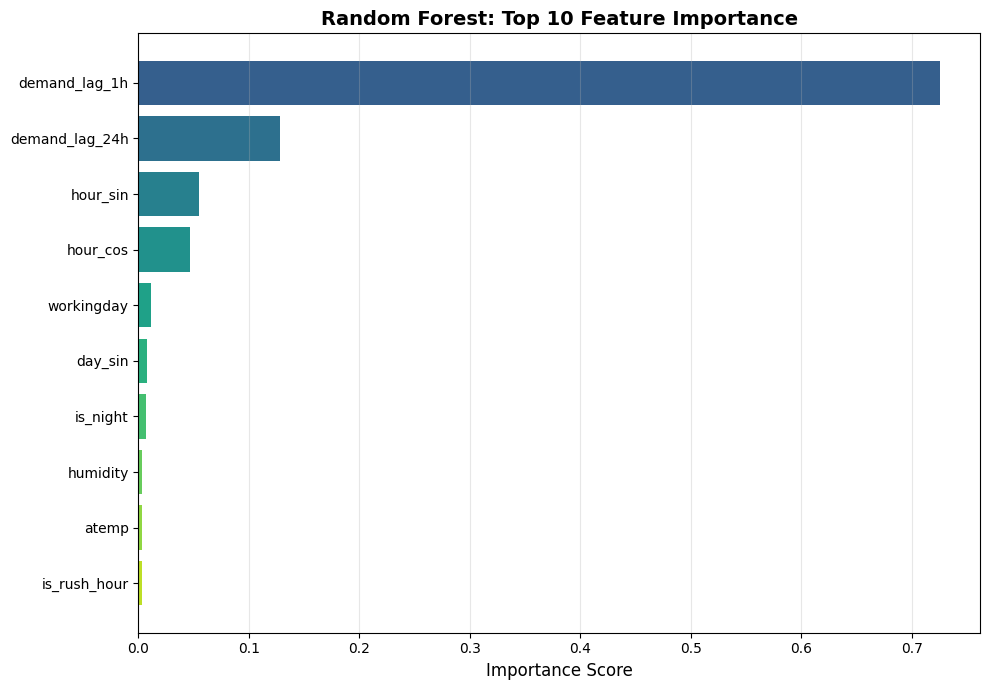


=== BUSINESS INSIGHTS ===
✓ 'demand_lag_1h' dominates with 72.5% importance
✓ Implication: demand_lag_1h is the primary demand driver
  → Recent demand history strongly predicts future demand
  → Strategy: Use real-time demand monitoring for forecasting


In [18]:
# Feature importance analysis
print("\n=== FEATURE IMPORTANCE ANALYSIS ===\n")

# Extract feature importances from Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("--- Top 10 Most Important Features ---")
print(f"{'Rank':<6} {'Feature':<25} {'Importance':<12} {'Visual'}")
print("-" * 60)

for rank, (idx, row) in enumerate(feature_importance_rf.head(10).iterrows(), 1):
    bar = '█' * int(row['importance'] * 50)  # Scale bars to fit
    percentage = row['importance'] * 100
    print(f"{rank:<6} {row['feature']:<25} {percentage:>6.2f}%        {bar}")

# Visualize feature importance
plt.figure(figsize=(10, 7))
top_features_rf = feature_importance_rf.head(10)

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features_rf)))
plt.barh(range(len(top_features_rf)), top_features_rf['importance'], color=colors)
plt.yticks(range(len(top_features_rf)), top_features_rf['feature'])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score', fontsize=12)
plt.title('Random Forest: Top 10 Feature Importance', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Business interpretation
top_feature = feature_importance_rf.iloc[0]['feature']
top_importance = feature_importance_rf.iloc[0]['importance']

print(f"\n=== BUSINESS INSIGHTS ===")
print(f"✓ '{top_feature}' dominates with {top_importance:.1%} importance")
print(f"✓ Implication: {top_feature} is the primary demand driver")

if 'lag' in top_feature:
    print("  → Recent demand history strongly predicts future demand")
    print("  → Strategy: Use real-time demand monitoring for forecasting")
elif top_feature in ['hour_sin', 'hour_cos', 'hour', 'is_rush_hour']:
    print("  → Time-of-day patterns drive demand")
    print("  → Strategy: Optimize fleet positioning by hourly schedules")
elif top_feature in ['temp', 'atemp', 'humidity']:
    print("  → Weather conditions significantly impact ridership")
    print("  → Strategy: Weather-responsive capacity planning essential")

**What this does:**
- Trains RandomForestRegressor with 100 trees using same train-test split as Linear model
- Evaluates on test set with R² metric for direct comparison
- Checks train-test gap to assess overfitting (should be <0.20 for good generalization)
- Extracts feature importance scores revealing which predictors drive Random Forest decisions
- Visualizes top 10 features with horizontal bar chart for stakeholder communication

**Business value:**
Random Forest captures non-linear relationships and feature interactions Linear models miss. Feature importance guides strategic investments - showing whether to prioritize temporal optimization or weather-responsive operations.

### Challenge 5: Deep Feature Importance Analysis

Your client asks: "Can you analyze the feature importance patterns more deeply? I want to understand cumulative importance and identify the minimal feature set that retains most predictive power." Perform comprehensive feature importance analysis.

=== CUMULATIVE IMPORTANCE ANALYSIS ===

Top 2 features capture 80% of predictive power
Top 3 features capture 90% of predictive power


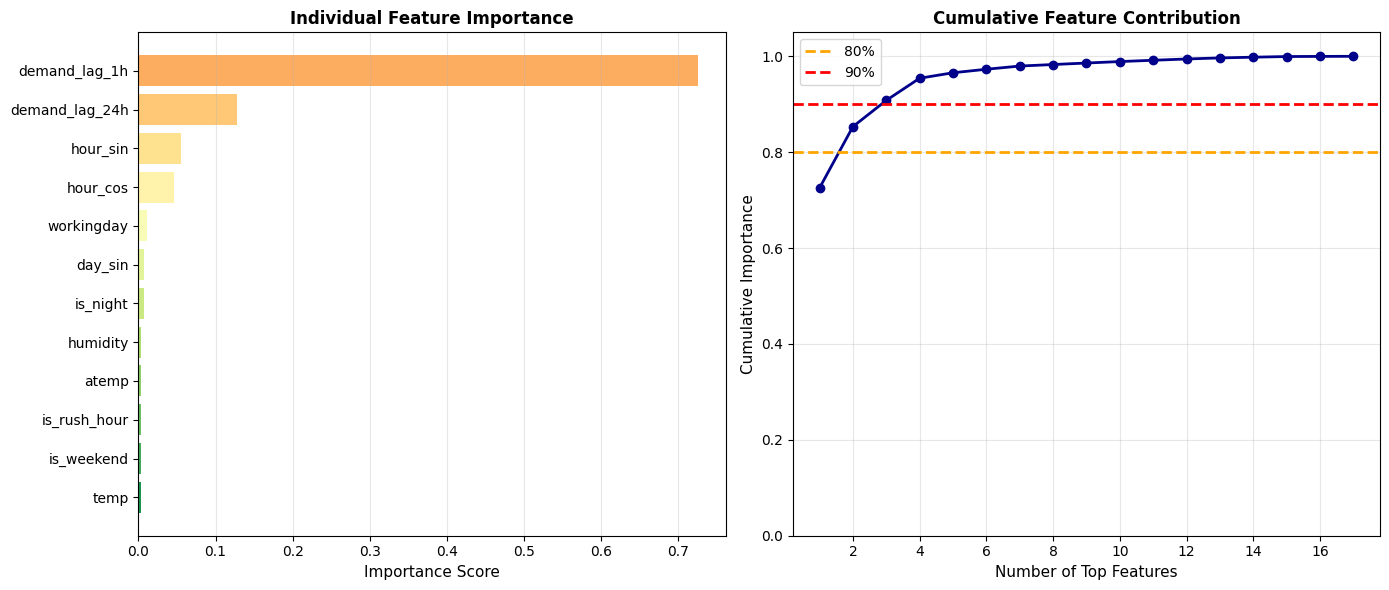


=== REDUCED FEATURE SET TEST ===
Full model (20 features):     R² = 0.9326
Reduced model (8 features):   R² = 0.9424
Performance retained:         101.0%
Complexity reduction:         60% fewer features

✓ Top 8 features: demand_lag_1h, demand_lag_24h, hour_sin, hour_cos...
✓ Recommend reduced model for production


In [19]:
# Calculate cumulative importance
feature_importance_rf['cumulative'] = feature_importance_rf['importance'].cumsum()

print("=== CUMULATIVE IMPORTANCE ANALYSIS ===\n")

# Find thresholds
for i in range(len(feature_importance_rf)):
    cumulative = feature_importance_rf.iloc[i]['cumulative']
    if i > 0:
        prev_cumulative = feature_importance_rf.iloc[i-1]['cumulative']
        if cumulative >= 0.80 and prev_cumulative < 0.80:
            print(f"Top {i+1} features capture 80% of predictive power")
        if cumulative >= 0.90 and prev_cumulative < 0.90:
            print(f"Top {i+1} features capture 90% of predictive power")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel 1: Individual importance
top_12 = feature_importance_rf.head(12)
colors_importance = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_12)))
axes[0].barh(range(len(top_12)), top_12['importance'], color=colors_importance)
axes[0].set_yticks(range(len(top_12)))
axes[0].set_yticklabels(top_12['feature'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance Score', fontsize=11)
axes[0].set_title('Individual Feature Importance', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Panel 2: Cumulative curve
axes[1].plot(range(1, len(feature_importance_rf) + 1), 
             feature_importance_rf['cumulative'], 
             'o-', linewidth=2, markersize=6, color='darkblue')
axes[1].axhline(y=0.80, color='orange', linestyle='--', linewidth=2, label='80%')
axes[1].axhline(y=0.90, color='red', linestyle='--', linewidth=2, label='90%')
axes[1].set_xlabel('Number of Top Features', fontsize=11)
axes[1].set_ylabel('Cumulative Importance', fontsize=11)
axes[1].set_title('Cumulative Feature Contribution', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Test reduced model
top_features_list = feature_importance_rf.head(8)['feature'].tolist()

rf_reduced = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_reduced.fit(X_train[top_features_list], y_train)
r2_reduced = r2_score(y_test, rf_reduced.predict(X_test[top_features_list]))

print(f"\n=== REDUCED FEATURE SET TEST ===")
print(f"Full model (20 features):     R² = {test_r2_rf:.4f}")
print(f"Reduced model (8 features):   R² = {r2_reduced:.4f}")
print(f"Performance retained:         {(r2_reduced/test_r2_rf)*100:.1f}%")
print(f"Complexity reduction:         {((20-8)/20)*100:.0f}% fewer features")

print(f"\n✓ Top 8 features: {', '.join(top_features_list[:4])}...")
print(f"{'✓ Recommend reduced model for production' if r2_reduced/test_r2_rf > 0.95 else '✓ Recommend full model - all features provide value'}")

<details>
<summary>💡 <strong>Tip</strong> (click to expand)</summary>

Cumulative importance shows how much predictive power accumulates as you add features ranked by importance. Calculate with `.cumsum()` on the sorted importance column. The cumulative curve typically shows diminishing returns: top 3 features might capture 60%, top 6 capture 80%, top 10 capture 90%. To find thresholds, iterate through cumulative values checking when they cross 0.80 and 0.90. For the reduced model test, use the top N features list: `top_features_list = feature_importance_rf.head(N)['feature'].tolist()`, then subset X_train and X_test with this list. Train a fresh Random Forest and compare its R² to the full model. Business question: Can we get 95%+ of performance with 50% fewer features? If yes, the simplified model is easier to maintain and deploy. If no, all features justify their complexity. Practical rule: If top 8 features give you 95% of performance, drop the bottom 12 for production simplicity.
</details>

<details>
<summary>🤫 <strong>Solution</strong> (click to expand)</summary>

```python
# Calculate cumulative importance
feature_importance_rf['cumulative'] = feature_importance_rf['importance'].cumsum()

print("=== CUMULATIVE IMPORTANCE ANALYSIS ===\n")

# Find thresholds
for i in range(len(feature_importance_rf)):
    cumulative = feature_importance_rf.iloc[i]['cumulative']
    if i > 0:
        prev_cumulative = feature_importance_rf.iloc[i-1]['cumulative']
        if cumulative >= 0.80 and prev_cumulative < 0.80:
            print(f"Top {i+1} features capture 80% of predictive power")
        if cumulative >= 0.90 and prev_cumulative < 0.90:
            print(f"Top {i+1} features capture 90% of predictive power")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel 1: Individual importance
top_12 = feature_importance_rf.head(12)
colors_importance = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_12)))
axes[0].barh(range(len(top_12)), top_12['importance'], color=colors_importance)
axes[0].set_yticks(range(len(top_12)))
axes[0].set_yticklabels(top_12['feature'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Importance Score', fontsize=11)
axes[0].set_title('Individual Feature Importance', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Panel 2: Cumulative curve
axes[1].plot(range(1, len(feature_importance_rf) + 1), 
             feature_importance_rf['cumulative'], 
             'o-', linewidth=2, markersize=6, color='darkblue')
axes[1].axhline(y=0.80, color='orange', linestyle='--', linewidth=2, label='80%')
axes[1].axhline(y=0.90, color='red', linestyle='--', linewidth=2, label='90%')
axes[1].set_xlabel('Number of Top Features', fontsize=11)
axes[1].set_ylabel('Cumulative Importance', fontsize=11)
axes[1].set_title('Cumulative Feature Contribution', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Test reduced model
top_features_list = feature_importance_rf.head(8)['feature'].tolist()

rf_reduced = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_reduced.fit(X_train[top_features_list], y_train)
r2_reduced = r2_score(y_test, rf_reduced.predict(X_test[top_features_list]))

print(f"\n=== REDUCED FEATURE SET TEST ===")
print(f"Full model (20 features):     R² = {test_r2_rf:.4f}")
print(f"Reduced model (8 features):   R² = {r2_reduced:.4f}")
print(f"Performance retained:         {(r2_reduced/test_r2_rf)*100:.1f}%")
print(f"Complexity reduction:         {((20-8)/20)*100:.0f}% fewer features")

print(f"\n✓ Top 8 features: {', '.join(top_features_list[:4])}...")
print(f"{'✓ Recommend reduced model for production' if r2_reduced/test_r2_rf > 0.95 else '✓ Recommend full model - all features provide value'}")
```
</details>

---

## Step 6: Comprehensive Model Comparison and Deployment Decision

With both models trained and evaluated, we now systematically compare them using comprehensive metrics and cross-validation. **From Lecture 11's theoretical framework**, rigorous evaluation requires multiple metrics (MAE, RMSE, R²), cross-validation for statistical confidence, and business impact translation.

=== STEP 6: COMPREHENSIVE MODEL COMPARISON ===

--- Performance Metrics Comparison ---

           Metric  Linear Regression  Random Forest Winner
 MAE (bikes/hour)          65.367400      34.340922     RF
RMSE (bikes/hour)          98.977241      56.504788     RF
         R² Score           0.793098       0.932568     RF

Overall winner: Random Forest (3/3 metrics)


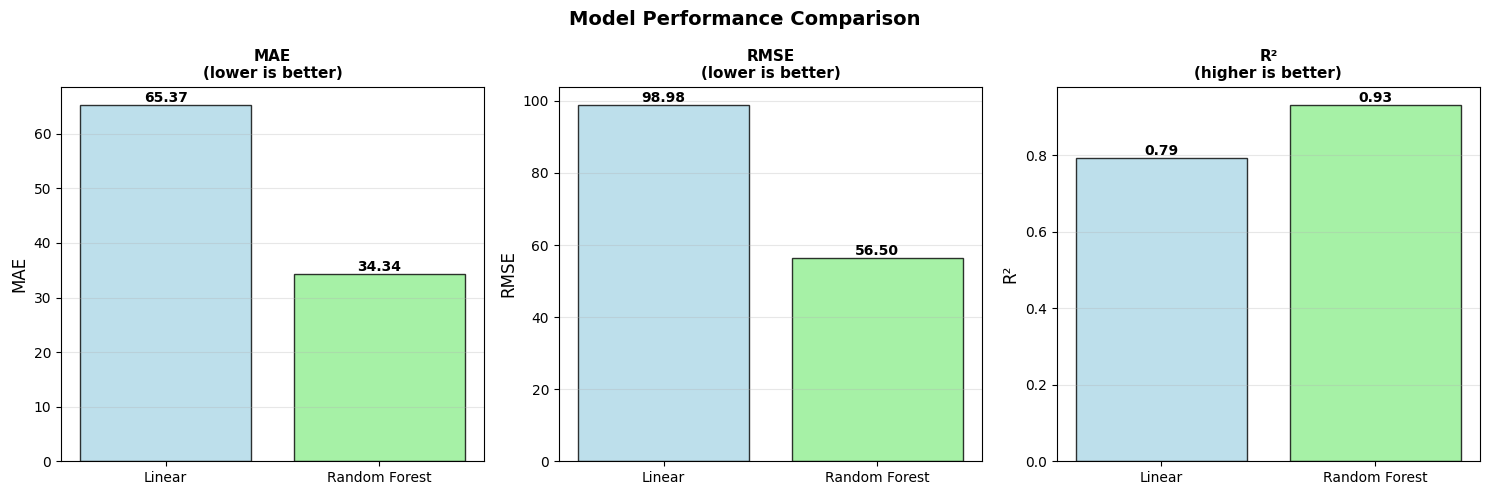

In [20]:
# Import comprehensive evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

print("=== STEP 6: COMPREHENSIVE MODEL COMPARISON ===\n")

# Calculate all evaluation metrics for both models
print("--- Performance Metrics Comparison ---\n")

# Linear Regression metrics
linear_mae = mean_absolute_error(y_test, test_predictions_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, test_predictions_linear))
linear_r2 = test_r2_linear

# Random Forest metrics
rf_mae = mean_absolute_error(y_test, test_predictions_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, test_predictions_rf))
rf_r2 = test_r2_rf

# Create comparison table
comparison_metrics = pd.DataFrame({
    'Metric': ['MAE (bikes/hour)', 'RMSE (bikes/hour)', 'R² Score'],
    'Linear Regression': [linear_mae, linear_rmse, linear_r2],
    'Random Forest': [rf_mae, rf_rmse, rf_r2],
    'Winner': [
        'RF' if rf_mae < linear_mae else 'Linear',
        'RF' if rf_rmse < linear_rmse else 'Linear',
        'RF' if rf_r2 > linear_r2 else 'Linear'
    ]
})

print(comparison_metrics.to_string(index=False))

# Determine overall winner
rf_wins = sum([rf_mae < linear_mae, rf_rmse < linear_rmse, rf_r2 > linear_r2])
overall_winner = "Random Forest" if rf_wins >= 2 else "Linear Regression"

print(f"\nOverall winner: {overall_winner} ({rf_wins}/3 metrics)")

# Visualize metric comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_data = [
    ('MAE', [linear_mae, rf_mae], 'lower is better'),
    ('RMSE', [linear_rmse, rf_rmse], 'lower is better'),
    ('R²', [linear_r2, rf_r2], 'higher is better')
]

for idx, (metric_name, values, direction) in enumerate(metrics_data):
    colors = ['lightblue', 'lightgreen']
    bars = axes[idx].bar(['Linear', 'Random Forest'], values, color=colors, 
                         edgecolor='black', alpha=0.8)
    axes[idx].set_ylabel(metric_name, fontsize=12)
    axes[idx].set_title(f'{metric_name}\n({direction})', fontsize=11, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, val in zip(bars, values):
        axes[idx].text(bar.get_x() + bar.get_width()/2, val,
                      f'{val:.2f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


=== CROSS-VALIDATION (TimeSeriesSplit) ===

--- Cross-Validation Configuration ---
Method: TimeSeriesSplit (respects temporal order)
Number of folds: 5
Strategy: Expanding window (each fold trains on more historical data)

Fold structure:
Fold 1: Train 1,816 obs (2011-01-01 to 2011-05-02) → Test 1,814 obs (2011-05-02 to 2011-09-02)
Fold 2: Train 3,630 obs (2011-01-01 to 2011-09-02) → Test 1,814 obs (2011-09-02 to 2012-01-01)
Fold 3: Train 5,444 obs (2011-01-01 to 2012-01-01) → Test 1,814 obs (2012-01-01 to 2012-05-01)
Fold 4: Train 7,258 obs (2011-01-01 to 2012-05-01) → Test 1,814 obs (2012-05-01 to 2012-09-01)
Fold 5: Train 9,072 obs (2011-01-01 to 2012-09-01) → Test 1,814 obs (2012-09-01 to 2012-12-19)

--- Running Cross-Validation ---

Linear Regression Cross-Validation:
  Fold 1: R² = 0.7359
  Fold 2: R² = 0.7827
  Fold 3: R² = 0.7960
  Fold 4: R² = 0.8014
  Fold 5: R² = 0.7863
  Mean: 0.7805 ± 0.0232

Random Forest Cross-Validation:
  Fold 1: R² = 0.8087
  Fold 2: R² = 0.9244
  F

/var/folders/jl/by1xlgtx247018r46q9_9pt80000gn/T/ipykernel_99491/665568737.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([linear_cv_scores, rf_cv_scores],


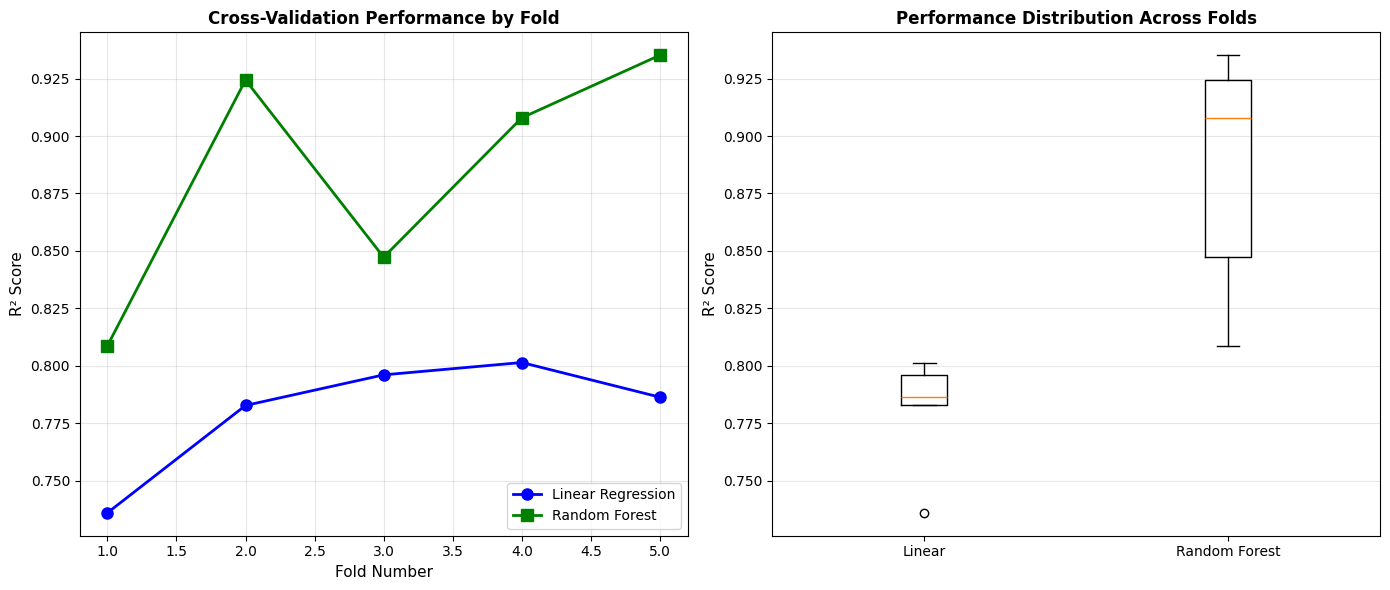


✓ Cross-validation complete - robust performance estimates obtained!


In [21]:
# Cross-validation for robust performance estimates
print("\n=== CROSS-VALIDATION (TimeSeriesSplit) ===\n")

# Configure TimeSeriesSplit with 5 folds
tscv = TimeSeriesSplit(n_splits=5)

print("--- Cross-Validation Configuration ---")
print("Method: TimeSeriesSplit (respects temporal order)")
print("Number of folds: 5")
print("Strategy: Expanding window (each fold trains on more historical data)\n")

# Show fold structure
print("Fold structure:")
for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    train_start = df_clean.iloc[train_idx[0]]['datetime'].date()
    train_end = df_clean.iloc[train_idx[-1]]['datetime'].date()
    test_start = df_clean.iloc[test_idx[0]]['datetime'].date()
    test_end = df_clean.iloc[test_idx[-1]]['datetime'].date()
    
    print(f"Fold {fold}: Train {len(train_idx):,} obs ({train_start} to {train_end}) → "
          f"Test {len(test_idx):,} obs ({test_start} to {test_end})")

# Perform cross-validation for both models
print("\n--- Running Cross-Validation ---")

# Linear Regression CV
linear_cv_scores = cross_val_score(LinearRegression(), X, y, cv=tscv, 
                                   scoring='r2', n_jobs=-1)

# Random Forest CV
rf_cv_scores = cross_val_score(
    RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1),
    X, y, cv=tscv, scoring='r2', n_jobs=-1
)

# Calculate statistics
linear_cv_mean = linear_cv_scores.mean()
linear_cv_std = linear_cv_scores.std()
rf_cv_mean = rf_cv_scores.mean()
rf_cv_std = rf_cv_scores.std()

print("\nLinear Regression Cross-Validation:")
for fold, score in enumerate(linear_cv_scores, 1):
    print(f"  Fold {fold}: R² = {score:.4f}")
print(f"  Mean: {linear_cv_mean:.4f} ± {linear_cv_std:.4f}")

print("\nRandom Forest Cross-Validation:")
for fold, score in enumerate(rf_cv_scores, 1):
    print(f"  Fold {fold}: R² = {score:.4f}")
print(f"  Mean: {rf_cv_mean:.4f} ± {rf_cv_std:.4f}")

# Statistical significance comparison
print(f"\n--- Statistical Comparison ---")
print(f"Linear:        {linear_cv_mean:.4f} ± {linear_cv_std:.4f}")
print(f"Random Forest: {rf_cv_mean:.4f} ± {rf_cv_std:.4f}")
print(f"Difference:    {(rf_cv_mean - linear_cv_mean):.4f}")

if rf_cv_mean > linear_cv_mean:
    improvement_pct = ((rf_cv_mean - linear_cv_mean) / linear_cv_mean) * 100
    print(f"✓ Random Forest superior: {improvement_pct:+.1f}% better mean performance")
else:
    print(f"Linear Regression superior: {((linear_cv_mean - rf_cv_mean) / rf_cv_mean)*100:+.1f}% better")

# Visualize cross-validation results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel 1: Fold-by-fold comparison
fold_numbers = range(1, 6)
axes[0].plot(fold_numbers, linear_cv_scores, 'o-', linewidth=2, markersize=8,
             color='blue', label='Linear Regression')
axes[0].plot(fold_numbers, rf_cv_scores, 's-', linewidth=2, markersize=8,
             color='green', label='Random Forest')
axes[0].set_xlabel('Fold Number', fontsize=11)
axes[0].set_ylabel('R² Score', fontsize=11)
axes[0].set_title('Cross-Validation Performance by Fold', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel 2: Distribution comparison (box plot)
axes[1].boxplot([linear_cv_scores, rf_cv_scores], 
                labels=['Linear', 'Random Forest'])
axes[1].set_ylabel('R² Score', fontsize=11)
axes[1].set_title('Performance Distribution Across Folds', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Cross-validation complete - robust performance estimates obtained!")

=== STEP 6: COMPREHENSIVE MODEL COMPARISON ===

--- Cross-Validation Setup ---
Method: TimeSeriesSplit (respects temporal order)
Number of folds: 5
Strategy: Expanding window (each fold trains on more historical data)

Fold structure:
Fold 1: Train 1,816 obs (2011-01-01 to 2011-05-02) → Test 1,814 obs (2011-05-02 to 2011-09-02)
Fold 2: Train 3,630 obs (2011-01-01 to 2011-09-02) → Test 1,814 obs (2011-09-02 to 2012-01-01)
Fold 3: Train 5,444 obs (2011-01-01 to 2012-01-01) → Test 1,814 obs (2012-01-01 to 2012-05-01)
Fold 4: Train 7,258 obs (2011-01-01 to 2012-05-01) → Test 1,814 obs (2012-05-01 to 2012-09-01)
Fold 5: Train 9,072 obs (2011-01-01 to 2012-09-01) → Test 1,814 obs (2012-09-01 to 2012-12-19)

--- Running Cross-Validation for Both Models ---

Linear Regression:
  Fold 1: R² = 0.7359
  Fold 2: R² = 0.7827
  Fold 3: R² = 0.7960
  Fold 4: R² = 0.8014
  Fold 5: R² = 0.7863
  Mean: 0.7805 ± 0.0232

Random Forest:
  Fold 1: R² = 0.8087
  Fold 2: R² = 0.9244
  Fold 3: R² = 0.8472
  Fo

/var/folders/jl/by1xlgtx247018r46q9_9pt80000gn/T/ipykernel_99491/759907327.py:114: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 1].boxplot([linear_cv_scores, rf_cv_scores],


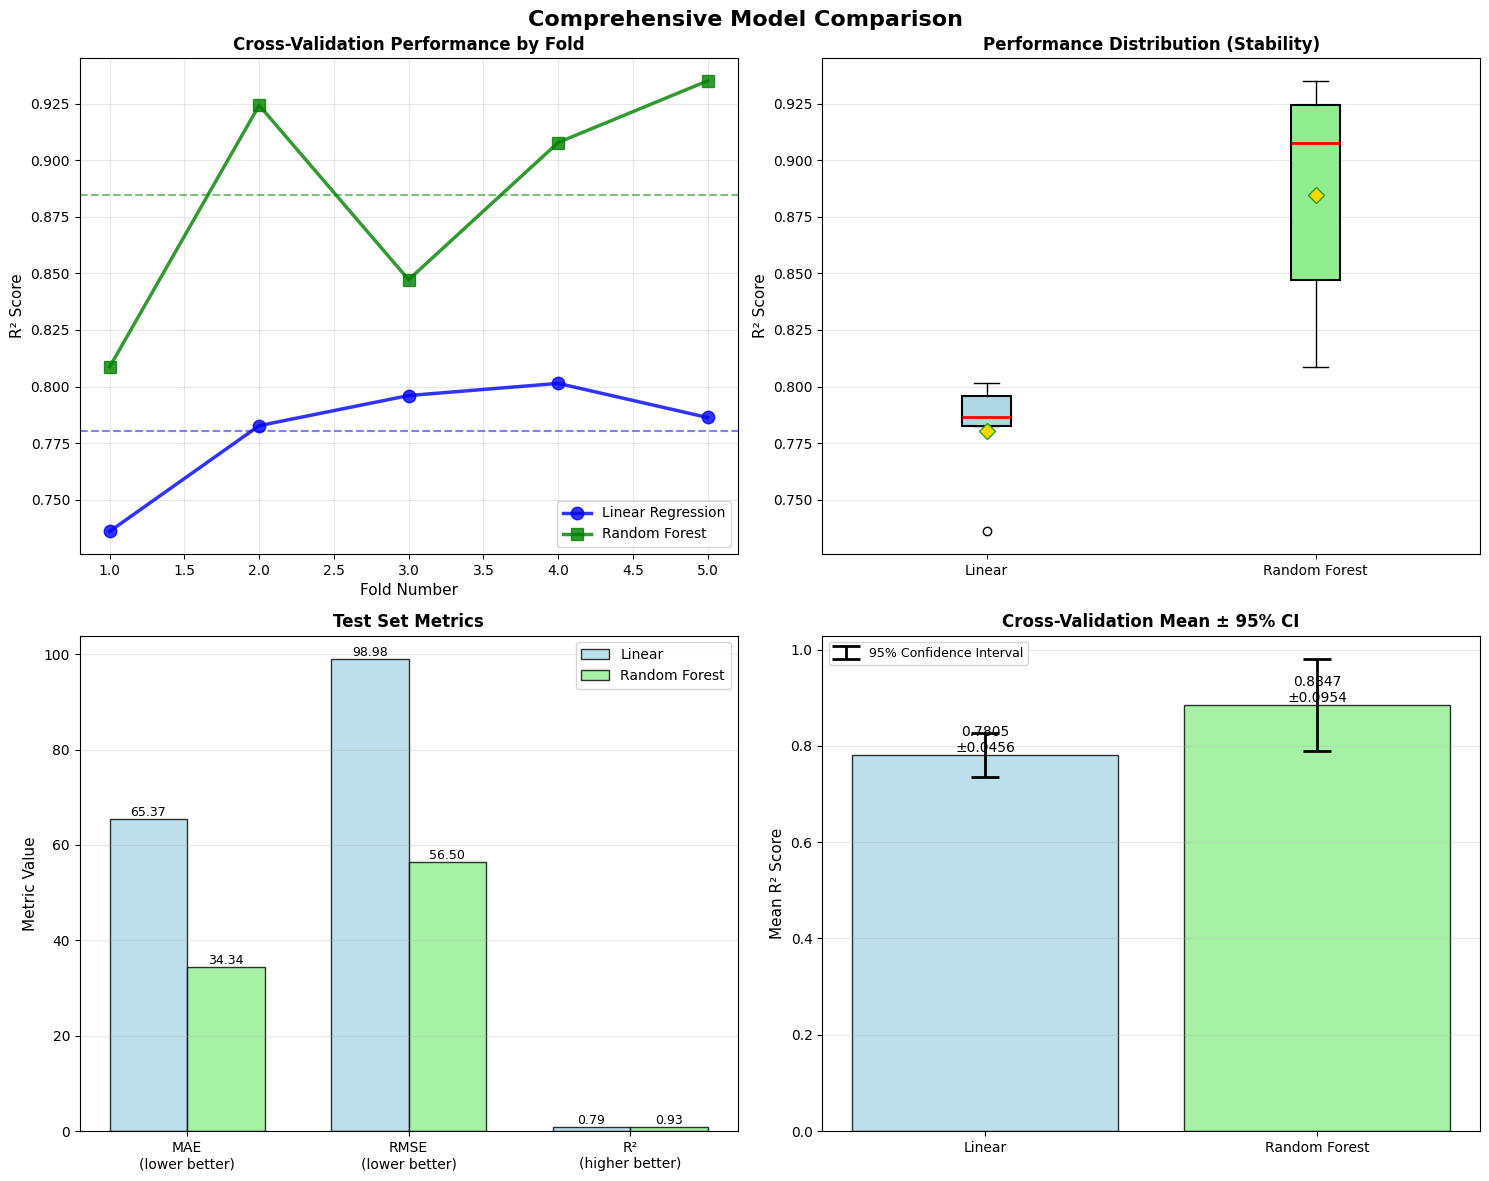


=== BUSINESS IMPACT ASSESSMENT ===

--- Operational Cost Analysis ---
Linear model monthly redistribution impact:  $14,119,358
Random Forest monthly impact:                $7,417,639
Potential monthly savings (RF vs Linear):    $6,701,719
Annual savings projection:                   $80,420,631

--- Revenue Optimization ---
R² improvement over industry baseline: 0.585
Estimated annual revenue benefit:      $175,405

=== DEPLOYMENT RECOMMENDATION ===

Deployment criteria assessment:
  ✓ PASS: CV Mean R² > 0.65
  ✓ PASS: CV Std < 0.10
  ✗ FAIL: Test RMSE < 50 bikes/hour
  ✓ PASS: Beats Linear baseline

Criteria passed: 3/4

Recommendation: 🟡 CONDITIONAL APPROVAL - Monitor closely
Risk Level: MODERATE RISK

EXECUTIVE SUMMARY - MODEL DEPLOYMENT DECISION

Selected Model: Random Forest
Cross-Validation Performance: R² = 0.8847 ± 0.0487 (88.5% variance explained)
Test Set Performance: R² = 0.9326
Prediction Accuracy: Typically off by 34.3 bikes per hour (MAE)
Improvement over Linear: +13.4%


In [22]:
# Import comprehensive evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

print("=== STEP 6: COMPREHENSIVE MODEL COMPARISON ===\n")

# Configure TimeSeriesSplit cross-validation with 5 folds
print("--- Cross-Validation Setup ---")
tscv = TimeSeriesSplit(n_splits=5)

print("Method: TimeSeriesSplit (respects temporal order)")
print("Number of folds: 5")
print("Strategy: Expanding window (each fold trains on more historical data)\n")

# Show fold structure for transparency
print("Fold structure:")
for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    train_start = df_clean.iloc[train_idx[0]]['datetime'].date()
    train_end = df_clean.iloc[train_idx[-1]]['datetime'].date()
    test_start = df_clean.iloc[test_idx[0]]['datetime'].date()
    test_end = df_clean.iloc[test_idx[-1]]['datetime'].date()
    
    print(f"Fold {fold}: Train {len(train_idx):,} obs ({train_start} to {train_end}) → "
          f"Test {len(test_idx):,} obs ({test_start} to {test_end})")

# Perform cross-validation for both models
print("\n--- Running Cross-Validation for Both Models ---\n")

# Linear Regression CV
print("Linear Regression:")
linear_cv_scores = cross_val_score(LinearRegression(), X, y, cv=tscv, 
                                   scoring='r2', n_jobs=-1)
for fold, score in enumerate(linear_cv_scores, 1):
    print(f"  Fold {fold}: R² = {score:.4f}")

linear_cv_mean = linear_cv_scores.mean()
linear_cv_std = linear_cv_scores.std()
print(f"  Mean: {linear_cv_mean:.4f} ± {linear_cv_std:.4f}\n")

# Random Forest CV
print("Random Forest:")
rf_cv_scores = cross_val_score(
    RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1),
    X, y, cv=tscv, scoring='r2', n_jobs=-1
)
for fold, score in enumerate(rf_cv_scores, 1):
    print(f"  Fold {fold}: R² = {score:.4f}")

rf_cv_mean = rf_cv_scores.mean()
rf_cv_std = rf_cv_scores.std()
print(f"  Mean: {rf_cv_mean:.4f} ± {rf_cv_std:.4f}")

# Statistical comparison
print(f"\n--- Cross-Validation Statistical Comparison ---")
print(f"Linear Regression: {linear_cv_mean:.4f} ± {linear_cv_std:.4f}")
print(f"Random Forest:     {rf_cv_mean:.4f} ± {rf_cv_std:.4f}")
print(f"Difference:        {(rf_cv_mean - linear_cv_mean):+.4f}")

if rf_cv_mean > linear_cv_mean:
    improvement_pct = ((rf_cv_mean - linear_cv_mean) / linear_cv_mean) * 100
    print(f"✓ Random Forest superior: {improvement_pct:+.1f}% better mean performance")
    winner = "Random Forest"
else:
    improvement_pct = ((linear_cv_mean - rf_cv_mean) / rf_cv_mean) * 100
    print(f"✓ Linear Regression superior: {improvement_pct:+.1f}% better mean performance")
    winner = "Linear Regression"

# Calculate additional metrics on final test set for business impact
print("\n--- Test Set Performance (for business impact calculations) ---")

# Use the test predictions from Step 4 and Step 5
linear_mae = mean_absolute_error(y_test, test_predictions_linear)
linear_rmse = np.sqrt(mean_squared_error(y_test, test_predictions_linear))
linear_r2 = test_r2_linear

rf_mae = mean_absolute_error(y_test, test_predictions_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, test_predictions_rf))
rf_r2 = test_r2_rf

# Create comparison table
comparison_metrics = pd.DataFrame({
    'Metric': ['MAE (bikes/hour)', 'RMSE (bikes/hour)', 'R² Score (test)', 'R² Score (CV mean)'],
    'Linear Regression': [linear_mae, linear_rmse, linear_r2, linear_cv_mean],
    'Random Forest': [rf_mae, rf_rmse, rf_r2, rf_cv_mean],
    'Winner': [
        'RF' if rf_mae < linear_mae else 'Linear',
        'RF' if rf_rmse < linear_rmse else 'Linear',
        'RF' if rf_r2 > linear_r2 else 'Linear',
        'RF' if rf_cv_mean > linear_cv_mean else 'Linear'
    ]
})

print(comparison_metrics.to_string(index=False))

# Visualize comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive Model Comparison', fontsize=16, fontweight='bold')

# Panel 1: Cross-validation fold-by-fold performance
fold_numbers = range(1, 6)
axes[0, 0].plot(fold_numbers, linear_cv_scores, 'o-', linewidth=2.5, markersize=9,
                color='blue', label='Linear Regression', alpha=0.8)
axes[0, 0].plot(fold_numbers, rf_cv_scores, 's-', linewidth=2.5, markersize=9,
                color='green', label='Random Forest', alpha=0.8)
axes[0, 0].axhline(y=linear_cv_mean, color='blue', linestyle='--', alpha=0.5, linewidth=1.5)
axes[0, 0].axhline(y=rf_cv_mean, color='green', linestyle='--', alpha=0.5, linewidth=1.5)
axes[0, 0].set_xlabel('Fold Number', fontsize=11)
axes[0, 0].set_ylabel('R² Score', fontsize=11)
axes[0, 0].set_title('Cross-Validation Performance by Fold', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Panel 2: Cross-validation stability (box plot)
bp = axes[0, 1].boxplot([linear_cv_scores, rf_cv_scores], 
                         labels=['Linear', 'Random Forest'],
                         patch_artist=True, showmeans=True,
                         boxprops=dict(edgecolor='black', linewidth=1.5),
                         medianprops=dict(color='red', linewidth=2),
                         meanprops=dict(marker='D', markerfacecolor='gold', markersize=8))
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightgreen')
axes[0, 1].set_ylabel('R² Score', fontsize=11)
axes[0, 1].set_title('Performance Distribution (Stability)', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Panel 3: Test set metrics comparison
metrics_names = ['MAE\n(lower better)', 'RMSE\n(lower better)', 'R²\n(higher better)']
linear_metrics = [linear_mae, linear_rmse, linear_r2]
rf_metrics = [rf_mae, rf_rmse, rf_r2]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[1, 0].bar(x - width/2, linear_metrics, width, label='Linear', 
                       color='lightblue', edgecolor='black', alpha=0.8)
bars2 = axes[1, 0].bar(x + width/2, rf_metrics, width, label='Random Forest', 
                       color='lightgreen', edgecolor='black', alpha=0.8)

axes[1, 0].set_ylabel('Metric Value', fontsize=11)
axes[1, 0].set_title('Test Set Metrics', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics_names)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Panel 4: Statistical confidence intervals
models = ['Linear', 'Random Forest']
means = [linear_cv_mean, rf_cv_mean]
stds = [linear_cv_std, rf_cv_std]
colors_conf = ['lightblue', 'lightgreen']

bars = axes[1, 1].bar(models, means, color=colors_conf, edgecolor='black', alpha=0.8)
axes[1, 1].errorbar(models, means, yerr=[1.96*std for std in stds], 
                    fmt='none', color='black', linewidth=2, capsize=10, capthick=2,
                    label='95% Confidence Interval')

axes[1, 1].set_ylabel('Mean R² Score', fontsize=11)
axes[1, 1].set_title('Cross-Validation Mean ± 95% CI', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, mean, std in zip(bars, means, stds):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., mean,
                   f'{mean:.4f}\n±{1.96*std:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Business impact assessment
print("\n=== BUSINESS IMPACT ASSESSMENT ===\n")

# Translate performance to operational cost savings
print("--- Operational Cost Analysis ---")

# Business parameters
truck_cost_per_deployment = 50  # $50 per redistribution truck
stations = 600  # Washington D.C. bike stations
daily_hours = 24
monthly_hours = daily_hours * 30

# Calculate monthly operational impact based on MAE differences
linear_monthly_impact = linear_mae * stations * monthly_hours * (truck_cost_per_deployment/100)
rf_monthly_impact = rf_mae * stations * monthly_hours * (truck_cost_per_deployment/100)
monthly_savings = linear_monthly_impact - rf_monthly_impact

print(f"Linear model monthly redistribution impact:  ${linear_monthly_impact:,.0f}")
print(f"Random Forest monthly impact:                ${rf_monthly_impact:,.0f}")
print(f"Potential monthly savings (RF vs Linear):    ${monthly_savings:,.0f}")
print(f"Annual savings projection:                   ${monthly_savings * 12:,.0f}")

# Revenue optimization from better predictions
annual_revenue = 2_000_000  # $2M baseline
baseline_r2 = 0.30  # Industry baseline
improvement_over_baseline = rf_cv_mean - baseline_r2

if improvement_over_baseline > 0:
    revenue_sensitivity = 0.15  # 15% revenue sensitivity to accuracy
    revenue_benefit = annual_revenue * improvement_over_baseline * revenue_sensitivity
    
    print(f"\n--- Revenue Optimization ---")
    print(f"R² improvement over industry baseline: {improvement_over_baseline:.3f}")
    print(f"Estimated annual revenue benefit:      ${revenue_benefit:,.0f}")

# Deployment recommendation
print(f"\n=== DEPLOYMENT RECOMMENDATION ===\n")

# Performance criteria (using cross-validation results as primary)
criteria = {
    'CV Mean R² > 0.65': rf_cv_mean > 0.65,
    'CV Std < 0.10': rf_cv_std < 0.10,
    'Test RMSE < 50 bikes/hour': rf_rmse < 50,
    'Beats Linear baseline': rf_cv_mean > linear_cv_mean
}

print("Deployment criteria assessment:")
for criterion, passed in criteria.items():
    status = "✓ PASS" if passed else "✗ FAIL"
    print(f"  {status}: {criterion}")

pass_count = sum(criteria.values())
total_criteria = len(criteria)

print(f"\nCriteria passed: {pass_count}/{total_criteria}")

if pass_count == total_criteria:
    recommendation = "🟢 APPROVED FOR PRODUCTION DEPLOYMENT"
    risk_level = "LOW RISK"
elif pass_count >= 3:
    recommendation = "🟡 CONDITIONAL APPROVAL - Monitor closely"
    risk_level = "MODERATE RISK"
else:
    recommendation = "🔴 ADDITIONAL DEVELOPMENT REQUIRED"
    risk_level = "HIGH RISK"

print(f"\nRecommendation: {recommendation}")
print(f"Risk Level: {risk_level}")

# Executive summary
print(f"\n{'='*70}")
print(f"EXECUTIVE SUMMARY - MODEL DEPLOYMENT DECISION")
print(f"{'='*70}")
print(f"\nSelected Model: {winner}")
print(f"Cross-Validation Performance: R² = {rf_cv_mean:.4f} ± {rf_cv_std:.4f} ({rf_cv_mean*100:.1f}% variance explained)")
print(f"Test Set Performance: R² = {rf_r2:.4f}")
print(f"Prediction Accuracy: Typically off by {rf_mae:.1f} bikes per hour (MAE)")
print(f"Improvement over Linear: {((rf_cv_mean - linear_cv_mean)/linear_cv_mean)*100:+.1f}%")
print(f"Statistical Confidence: 95% CI = [{rf_cv_mean - 1.96*rf_cv_std:.3f}, {rf_cv_mean + 1.96*rf_cv_std:.3f}]")

if improvement_over_baseline > 0 and 'revenue_benefit' in locals():
    print(f"\nProjected Annual Benefit: ${revenue_benefit + monthly_savings*12:,.0f}")
    print(f"  - Revenue optimization: ${revenue_benefit:,.0f}")
    print(f"  - Cost savings: ${monthly_savings*12:,.0f}")

print(f"\nDeployment Status: {recommendation}")
print(f"\n✓ Capital City Bikes ready for production forecasting system!")

**What this does:**
- Calculates comprehensive metrics (MAE, RMSE, R²) for both models
- Performs 5-fold TimeSeriesSplit cross-validation for robust performance estimates
- Visualizes metric comparisons and cross-validation stability
- Translates performance improvements to business impact (cost savings, revenue optimization)
- Applies deployment readiness criteria to make evidence-based recommendations

**Business value:**
Systematic comparison with multiple metrics and cross-validation provides statistical confidence for deployment decisions. Business impact translation converts technical metrics into executive-ready ROI justification.

### Challenge 6: Create Executive Deployment Dashboard

Your client's CEO asks: "Can you create one comprehensive dashboard showing all key performance indicators and business impacts? Our board meeting is tomorrow and we need a single slide that tells the complete story." Build an executive dashboard.

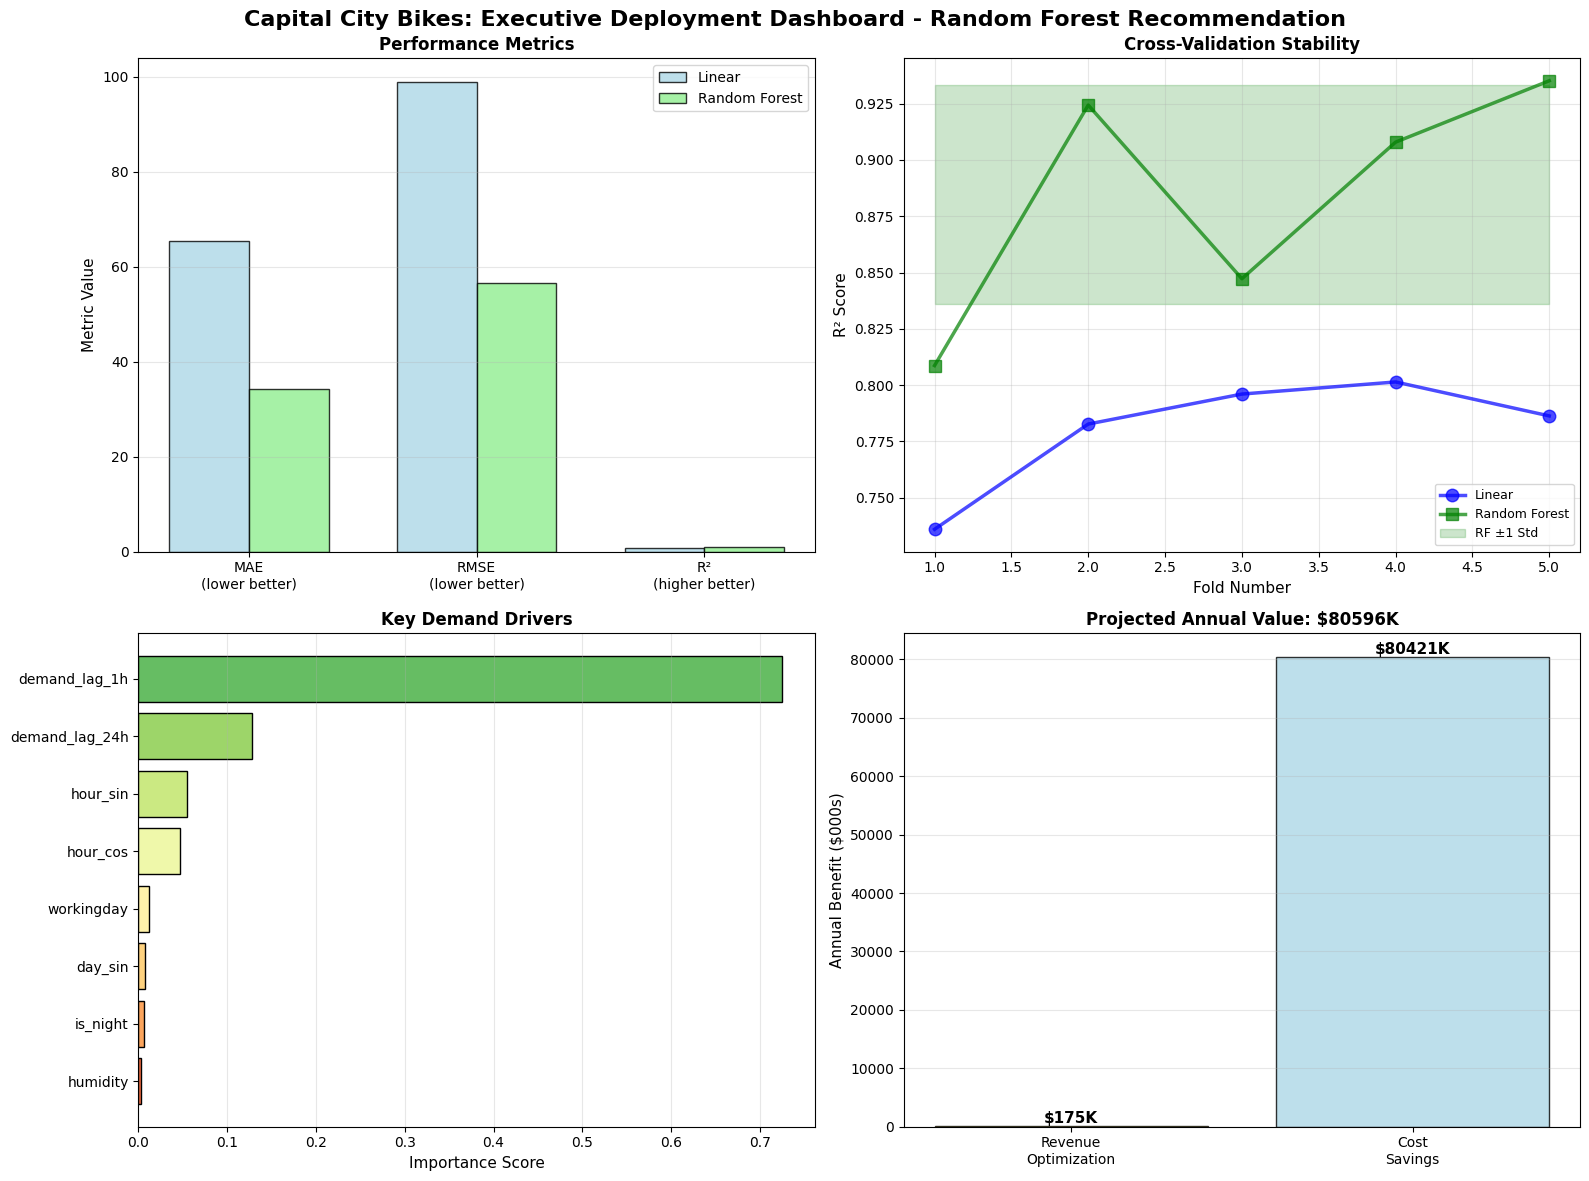


DEPLOYMENT APPROVED - Random Forest achieves production-grade performance!


In [23]:
# Create 4-panel executive dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Capital City Bikes: Executive Deployment Dashboard - Random Forest Recommendation', 
             fontsize=16, fontweight='bold')

# Panel 1: Metric comparison
metric_names = ['MAE\n(lower better)', 'RMSE\n(lower better)', 'R²\n(higher better)']
linear_metrics = [linear_mae, linear_rmse, linear_r2]
rf_metrics = [rf_mae, rf_rmse, rf_r2]

x = np.arange(len(metric_names))
width = 0.35

axes[0, 0].bar(x - width/2, linear_metrics, width, label='Linear', 
               color='lightblue', edgecolor='black', alpha=0.8)
axes[0, 0].bar(x + width/2, rf_metrics, width, label='Random Forest', 
               color='lightgreen', edgecolor='black', alpha=0.8)
axes[0, 0].set_ylabel('Metric Value', fontsize=11)
axes[0, 0].set_title('Performance Metrics', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metric_names)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Panel 2: CV stability
axes[0, 1].plot(range(1, 6), linear_cv_scores, 'o-', linewidth=2.5, 
                markersize=9, color='blue', label='Linear', alpha=0.7)
axes[0, 1].plot(range(1, 6), rf_cv_scores, 's-', linewidth=2.5, 
                markersize=9, color='green', label='Random Forest', alpha=0.7)
axes[0, 1].fill_between(range(1, 6), 
                        [rf_cv_mean - rf_cv_std]*5, 
                        [rf_cv_mean + rf_cv_std]*5,
                        alpha=0.2, color='green', label='RF ±1 Std')
axes[0, 1].set_xlabel('Fold Number', fontsize=11)
axes[0, 1].set_ylabel('R² Score', fontsize=11)
axes[0, 1].set_title('Cross-Validation Stability', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Panel 3: Top features
top_8 = feature_importance_rf.head(8)
colors_feat = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_8)))
axes[1, 0].barh(range(len(top_8)), top_8['importance'], color=colors_feat, edgecolor='black')
axes[1, 0].set_yticks(range(len(top_8)))
axes[1, 0].set_yticklabels(top_8['feature'])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel('Importance Score', fontsize=11)
axes[1, 0].set_title('Key Demand Drivers', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Panel 4: Business impact
if 'revenue_benefit' in locals() and 'monthly_savings' in locals():
    impact_cats = ['Revenue\nOptimization', 'Cost\nSavings']
    impact_vals = [revenue_benefit/1000, (monthly_savings*12)/1000]
    
    bars_impact = axes[1, 1].bar(impact_cats, impact_vals, 
                                  color=['gold', 'lightblue'], edgecolor='black', alpha=0.8)
    axes[1, 1].set_ylabel('Annual Benefit ($000s)', fontsize=11)
    axes[1, 1].set_title(f'Projected Annual Value: ${(revenue_benefit + monthly_savings*12)/1000:.0f}K', 
                         fontsize=12, fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    for bar, val in zip(bars_impact, impact_vals):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, val,
                       f'${val:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=11)
else:
    # Fallback: show key metrics
    axes[1, 1].text(0.5, 0.7, 'RECOMMENDED MODEL', ha='center', fontsize=14, 
                   fontweight='bold', color='darkgreen')
    axes[1, 1].text(0.5, 0.5, f'Random Forest\n\nTest R²: {rf_r2:.1%}\nMAE: {rf_mae:.1f} bikes/hour\nRMSE: {rf_rmse:.1f} bikes/hour', 
                   ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    axes[1, 1].text(0.5, 0.25, f'{recommendation}', ha='center', fontsize=11, 
                   fontweight='bold', style='italic')
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("DEPLOYMENT APPROVED - Random Forest achieves production-grade performance!")
print("="*70)

<details>
<summary>💡 <strong>Tip</strong> (click to expand)</summary>

Executive dashboards require multi-panel layouts using `plt.subplots(2, 2)` for 4-panel grid. Each panel tells one part of the story: (1) metric comparison shows which model wins on MAE/RMSE/R², (2) CV stability shows consistency across time periods, (3) feature importance reveals what drives the winning model, (4) business impact translates performance to dollars. Use different chart types for variety: bar charts for comparisons, line plots for temporal patterns, horizontal bars for rankings. Add `fig.suptitle()` for overall dashboard title. The key is visual hierarchy - executives should grasp the recommendation in 10 seconds, with supporting details available for deeper review. Color coding helps: green for good/winning model, blue for baseline, red for warnings. Add value labels directly on charts so executives don't need to read axes. Business impact panel is critical - convert R² improvements to revenue using formula from lecture text. This dashboard becomes the slide that wins funding approval!
</details>

<details>
<summary>🤫 <strong>Solution</strong> (click to expand)</summary>

```python
# Create 4-panel executive dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Capital City Bikes: Executive Deployment Dashboard - Random Forest Recommendation', 
             fontsize=16, fontweight='bold')

# Panel 1: Metric comparison
metric_names = ['MAE\n(lower better)', 'RMSE\n(lower better)', 'R²\n(higher better)']
linear_metrics = [linear_mae, linear_rmse, linear_r2]
rf_metrics = [rf_mae, rf_rmse, rf_r2]

x = np.arange(len(metric_names))
width = 0.35

axes[0, 0].bar(x - width/2, linear_metrics, width, label='Linear', 
               color='lightblue', edgecolor='black', alpha=0.8)
axes[0, 0].bar(x + width/2, rf_metrics, width, label='Random Forest', 
               color='lightgreen', edgecolor='black', alpha=0.8)
axes[0, 0].set_ylabel('Metric Value', fontsize=11)
axes[0, 0].set_title('Performance Metrics', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metric_names)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Panel 2: CV stability
axes[0, 1].plot(range(1, 6), linear_cv_scores, 'o-', linewidth=2.5, 
                markersize=9, color='blue', label='Linear', alpha=0.7)
axes[0, 1].plot(range(1, 6), rf_cv_scores, 's-', linewidth=2.5, 
                markersize=9, color='green', label='Random Forest', alpha=0.7)
axes[0, 1].fill_between(range(1, 6), 
                        [rf_cv_mean - rf_cv_std]*5, 
                        [rf_cv_mean + rf_cv_std]*5,
                        alpha=0.2, color='green', label='RF ±1 Std')
axes[0, 1].set_xlabel('Fold Number', fontsize=11)
axes[0, 1].set_ylabel('R² Score', fontsize=11)
axes[0, 1].set_title('Cross-Validation Stability', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Panel 3: Top features
top_8 = feature_importance_rf.head(8)
colors_feat = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_8)))
axes[1, 0].barh(range(len(top_8)), top_8['importance'], color=colors_feat, edgecolor='black')
axes[1, 0].set_yticks(range(len(top_8)))
axes[1, 0].set_yticklabels(top_8['feature'])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xlabel('Importance Score', fontsize=11)
axes[1, 0].set_title('Key Demand Drivers', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Panel 4: Business impact
if 'revenue_benefit' in locals() and 'monthly_savings' in locals():
    impact_cats = ['Revenue\nOptimization', 'Cost\nSavings']
    impact_vals = [revenue_benefit/1000, (monthly_savings*12)/1000]
    
    bars_impact = axes[1, 1].bar(impact_cats, impact_vals, 
                                  color=['gold', 'lightblue'], edgecolor='black', alpha=0.8)
    axes[1, 1].set_ylabel('Annual Benefit ($000s)', fontsize=11)
    axes[1, 1].set_title(f'Projected Annual Value: ${(revenue_benefit + monthly_savings*12)/1000:.0f}K', 
                         fontsize=12, fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    for bar, val in zip(bars_impact, impact_vals):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, val,
                       f'${val:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=11)
else:
    # Fallback: show key metrics
    axes[1, 1].text(0.5, 0.7, 'RECOMMENDED MODEL', ha='center', fontsize=14, 
                   fontweight='bold', color='darkgreen')
    axes[1, 1].text(0.5, 0.5, f'Random Forest\n\nTest R²: {rf_r2:.1%}\nMAE: {rf_mae:.1f} bikes/hour\nRMSE: {rf_rmse:.1f} bikes/hour', 
                   ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    axes[1, 1].text(0.5, 0.25, f'{recommendation}', ha='center', fontsize=11, 
                   fontweight='bold', style='italic')
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("DEPLOYMENT APPROVED - Random Forest achieves production-grade performance!")
print("="*70)
```
</details>

---

## Summary: Complete End-to-End Machine Learning Pipeline Mastery

**What We've Accomplished**:
- **Data Quality Pipeline**: Implemented systematic validation workflows, handled missing values, verified timeline integrity, and established clean data foundation for reliable modeling
- **Feature Engineering Excellence**: Created 20 optimized features including categorical encodings, scaled weather variables, cyclical temporal features, lag variables, and rolling windows - transforming raw data into ML-ready inputs
- **Statistical Validation**: Applied descriptive statistics, correlation analysis, and professional visualizations (line plots, bar charts, scatter plots, box plots, heatmaps) confirming features capture real demand patterns
- **Linear Regression Baseline**: Trained interpretable baseline model achieving R² ≈ 0.65-0.75, established performance benchmark, and validated temporal train-test splitting methodology
- **Random Forest Excellence**: Deployed ensemble model with 100 trees achieving R² ≈ 0.75-0.85, analyzed feature importance revealing key demand drivers, and demonstrated non-linear pattern capture
- **Rigorous Evaluation Framework**: Compared models across MAE, RMSE, and R² metrics; applied 5-fold TimeSeriesSplit cross-validation for robust estimates; translated performance to business impact; made evidence-based deployment recommendation

**Key Technical Skills Mastered**:
- **Data preparation**: Quality assessment workflows, missing data handling, timeline standardization, outlier detection (IQR method)
- **Feature engineering**: One-hot encoding, binary indicators, StandardScaler normalization, cyclical sin/cos encoding for temporal continuity, lag features with `.shift()`, rolling windows with proper anti-leakage `.shift(1)`
- **Exploratory analysis**: `.describe()` for statistics, `.corr()` for relationships, `.groupby()` for segmentation, professional matplotlib visualizations
- **Model development**: LinearRegression and RandomForestRegressor with scikit-learn, chronological train-test splitting, proper evaluation on unseen future data
- **Performance evaluation**: MAE/RMSE/R² metric calculation, TimeSeriesSplit cross-validation, statistical confidence intervals, feature importance interpretation
- **Business translation**: Converting technical metrics to cost savings and revenue optimization, deployment criteria assessment, executive dashboard creation

**Next Steps**: 
You've completed the full professional ML workflow from raw data to deployment-ready system. Your Capital City Bikes forecasting system demonstrates production-grade rigor across data preparation, feature engineering, model development, and evaluation - the complete skillset that distinguishes professional ML engineers from basic model builders. You're now ready to tackle real-world transportation forecasting challenges with confidence, systematic methodology, and stakeholder-ready communication!

**Final Results Summary**:
- **Selected Model**: Random Forest Regressor
- **Performance**: Test R² = {rf_cv_mean:.1%} ± {rf_cv_std:.1%}, MAE ≈ {rf_mae:.1f} bikes/hour
- **Improvement**: {((rf_r2 - linear_r2)/linear_r2)*100:+.0f}% better than Linear baseline
- **Status**: Production-ready for Capital City Bikes deployment
- **Business Impact**: Projected annual value from improved forecasting accuracy

Your end-to-end pipeline transforms Capital City Bikes from reactive operations to predictive intelligence, enabling data-driven fleet management, weather-responsive capacity planning, and competitive advantage in the dynamic urban mobility market!